# PREAMBULE :

# INSTALLATION :

# Installation Matplotlib :

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Installation NumPy :

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Installation pandas :

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Installation plotly :

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Installation PyTorch :

In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


# Installation Scikit-Learn :

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Installation Seaborn :

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Versions :

# IMPORTATION :

In [8]:
# Importation des Bibliothèques :

import matplotlib.colors 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from time import time
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

# DOCUMENTATION :

In [9]:
# Documentation :

print("DOCUMENTATION: ")

pd.set_option("max_colwidth", 400)

description = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/HomeCredit_columns_description.csv',  encoding="ISO-8859-1")

description

DOCUMENTATION: 


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan),time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment,NaN


# STRUCTURE DES DONNEES :

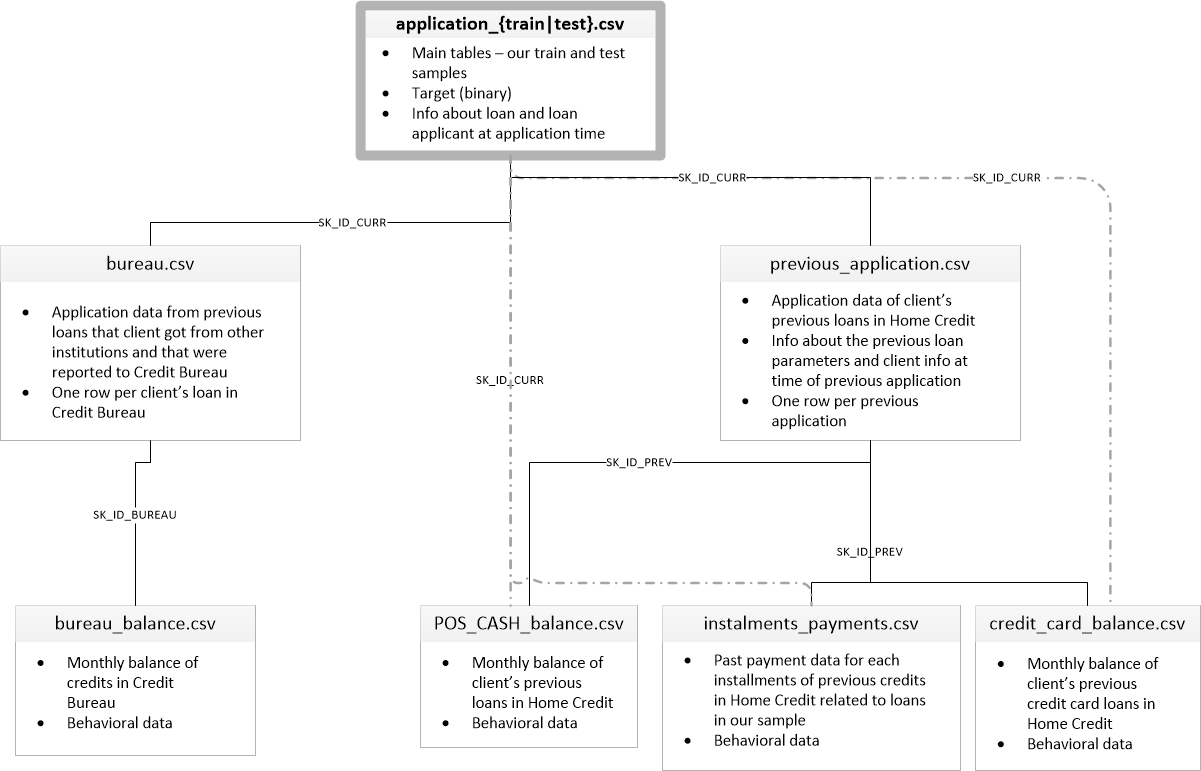

# I EXPLORATORY DATA ANALYSIS EDA :

# ALPHA - Lecture Fichier "APPLICATION TEST / TRAIN" :

Il s'agit du fichier principal, divisé en deux fichiers pour Train (avec TARGET) et Test (sans TARGET). Ce sont des données pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données. 

In [10]:
# Application Test Data :

app_test = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/application_test.csv')

app_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Application Train Data :

app_train = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/application_train.csv')

app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# COMPREHENSION DE LA VARIABLE CIBLE :

In [12]:
# Distribution de la Colonne Cible :

app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:title={'center':'Répartition de la Variable Cible'}, ylabel='Frequency'>

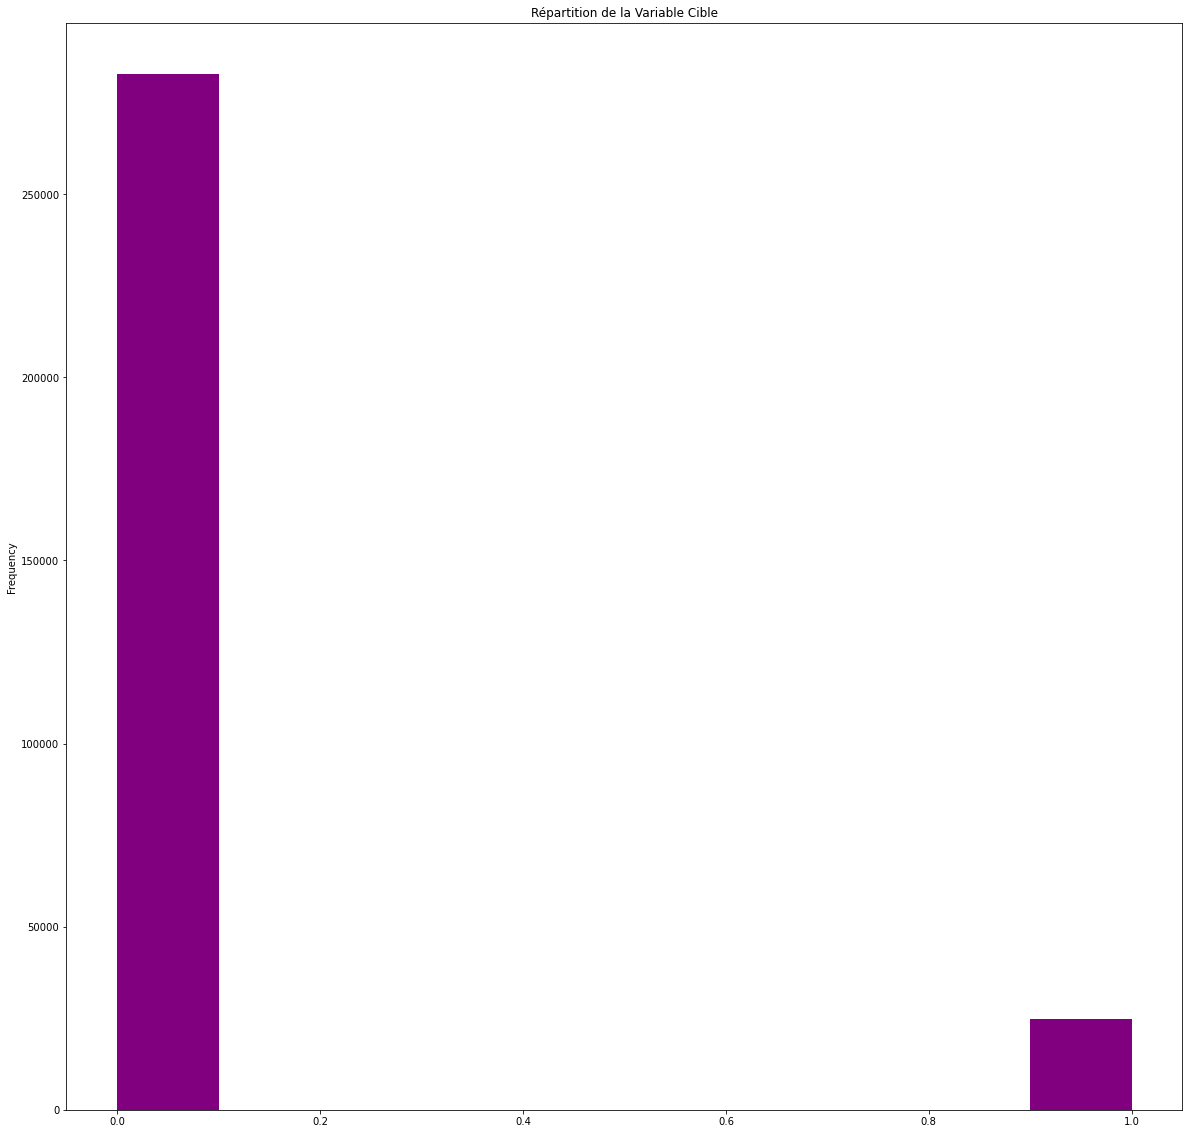

In [13]:
# Histogramme de la Colonne Cible :

app_train['TARGET'].plot.hist(color = 'Purple', title = 'Répartition de la Variable Cible', figsize = (20,20))

# Interprétation :

- On constate qu'il y a plus de bons payeurs (0) que de mauvais payeurs (1).

# A- MISE EN EVIDENCE :

In [14]:
# Nombre de Lignes et de Colonnes :

nRow, nCol = app_test.shape

print(f'Le dataset contient {nRow} Lignes et {nCol} Colonnes.')

Le dataset contient 48744 Lignes et 121 Colonnes.


In [15]:
# Nombre de Lignes et de Colonnes :

nRow, nCol = app_train.shape

print(f'Le dataset contient {nRow} Lignes et {nCol} Colonnes.')

Le dataset contient 307511 Lignes et 122 Colonnes.


In [16]:
# Visualisation :

app_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Visualisation :

app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


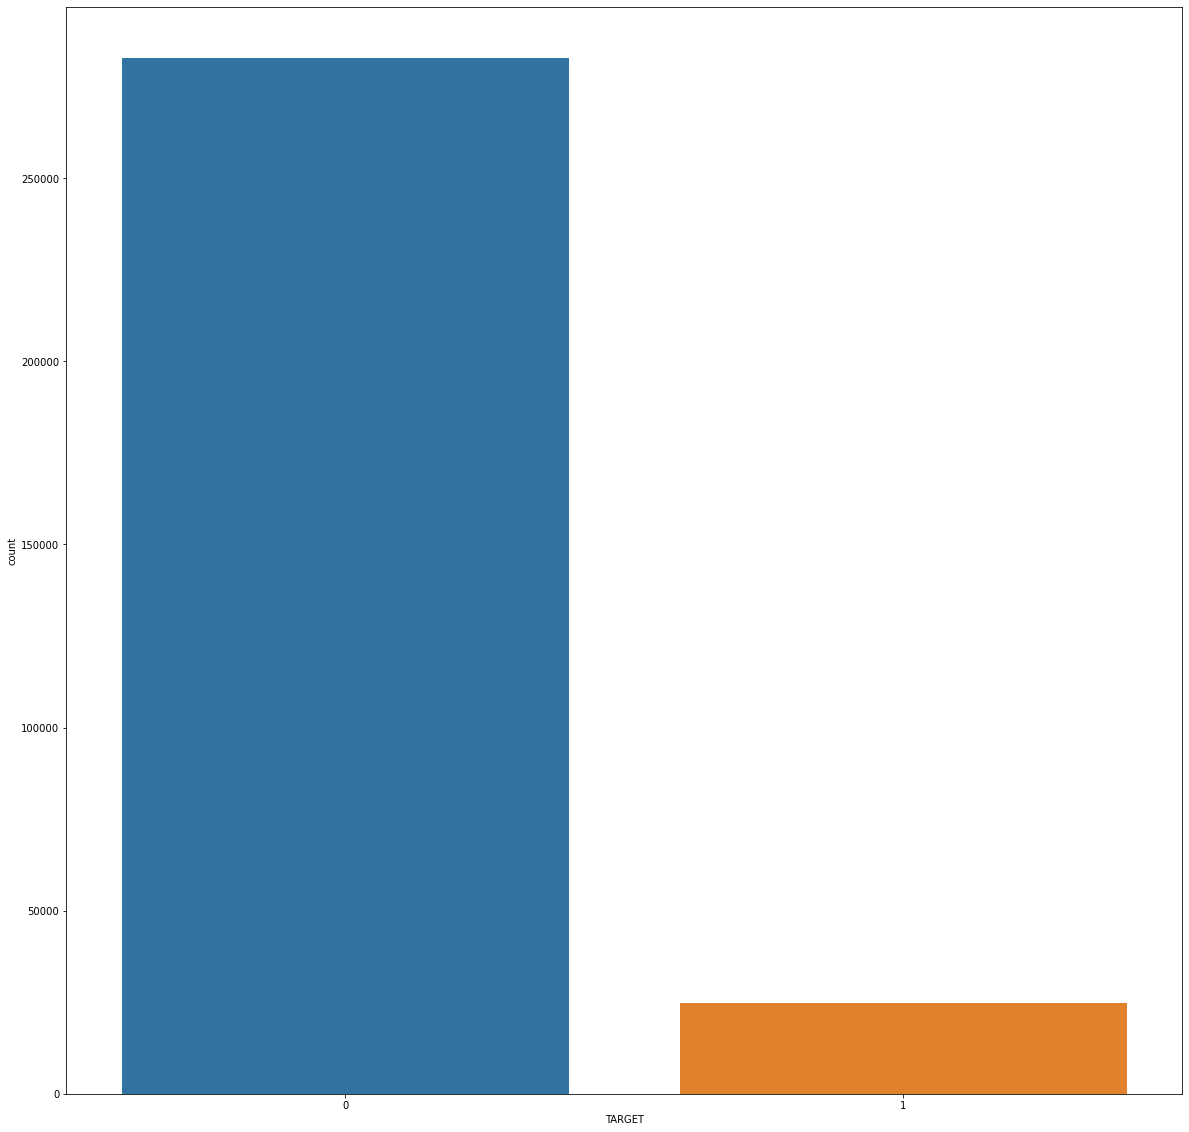

In [18]:
# Quantification selon la Cible :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'TARGET', data = app_train, order = app_train['TARGET'].value_counts().index)

plt.show()

# Interprétation :

- On constate qu'il y a plus de bons payeurs (0) que de mauvais payeurs (1).

In [19]:
# Types de Variables Test : 

app_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [20]:
# Types de Variables Train : 

app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [21]:
# Quantification des Variables Test :

app_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [22]:
# Quantification des Variables Train :

app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [23]:
# Analyse Statistique Test :

app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [24]:
# Analyse Statistique Train :

app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# B- VALEURS MANQUANTES :

<AxesSubplot:>

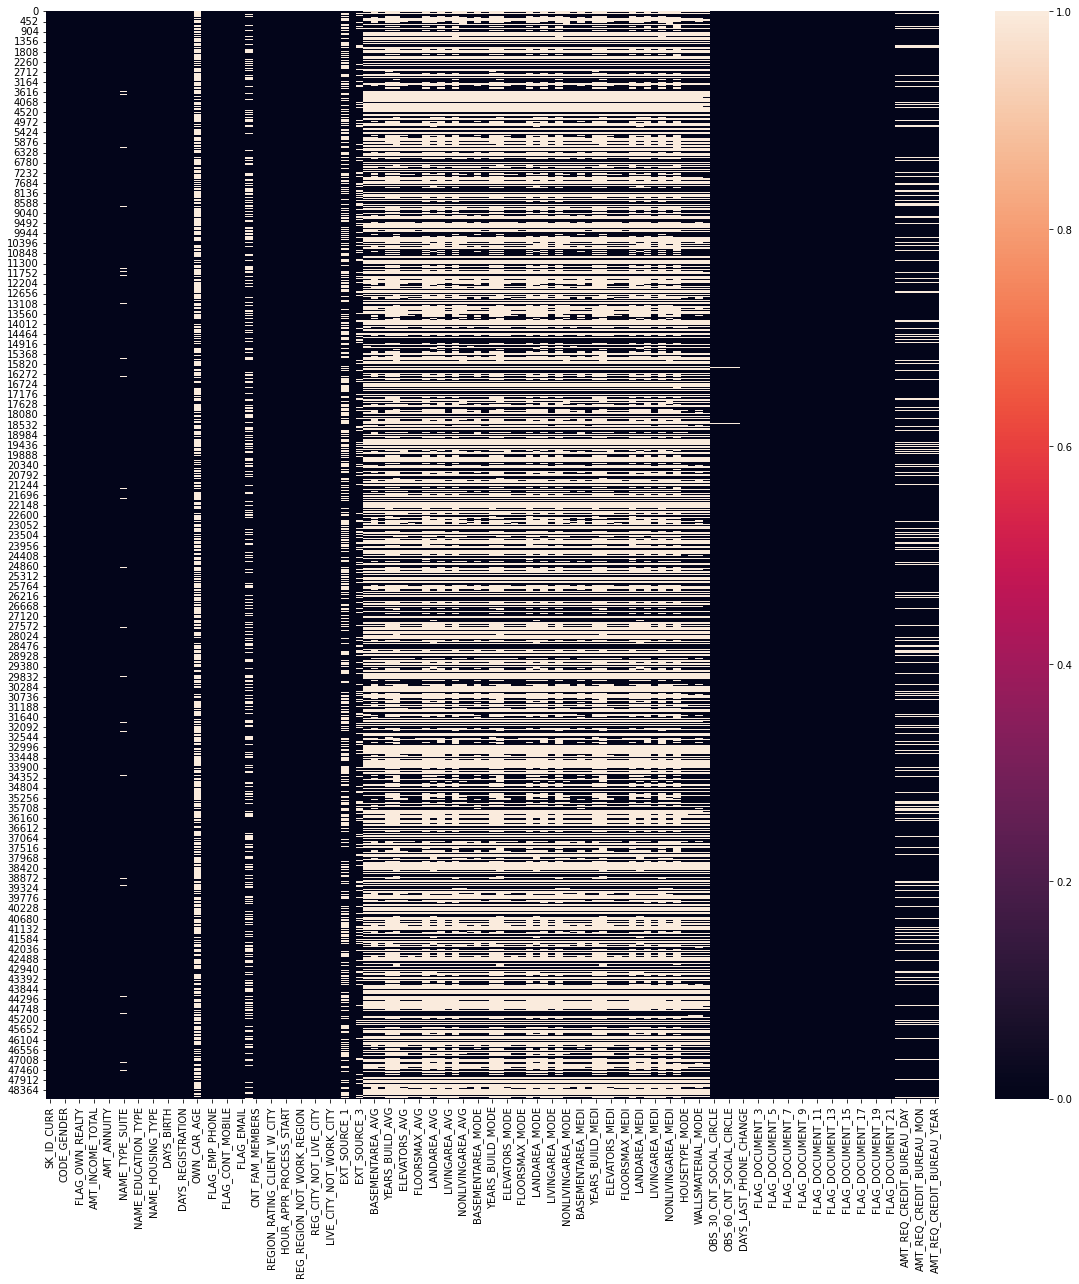

In [25]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine "Application Test" :

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(app_test.isnull())

<AxesSubplot:>

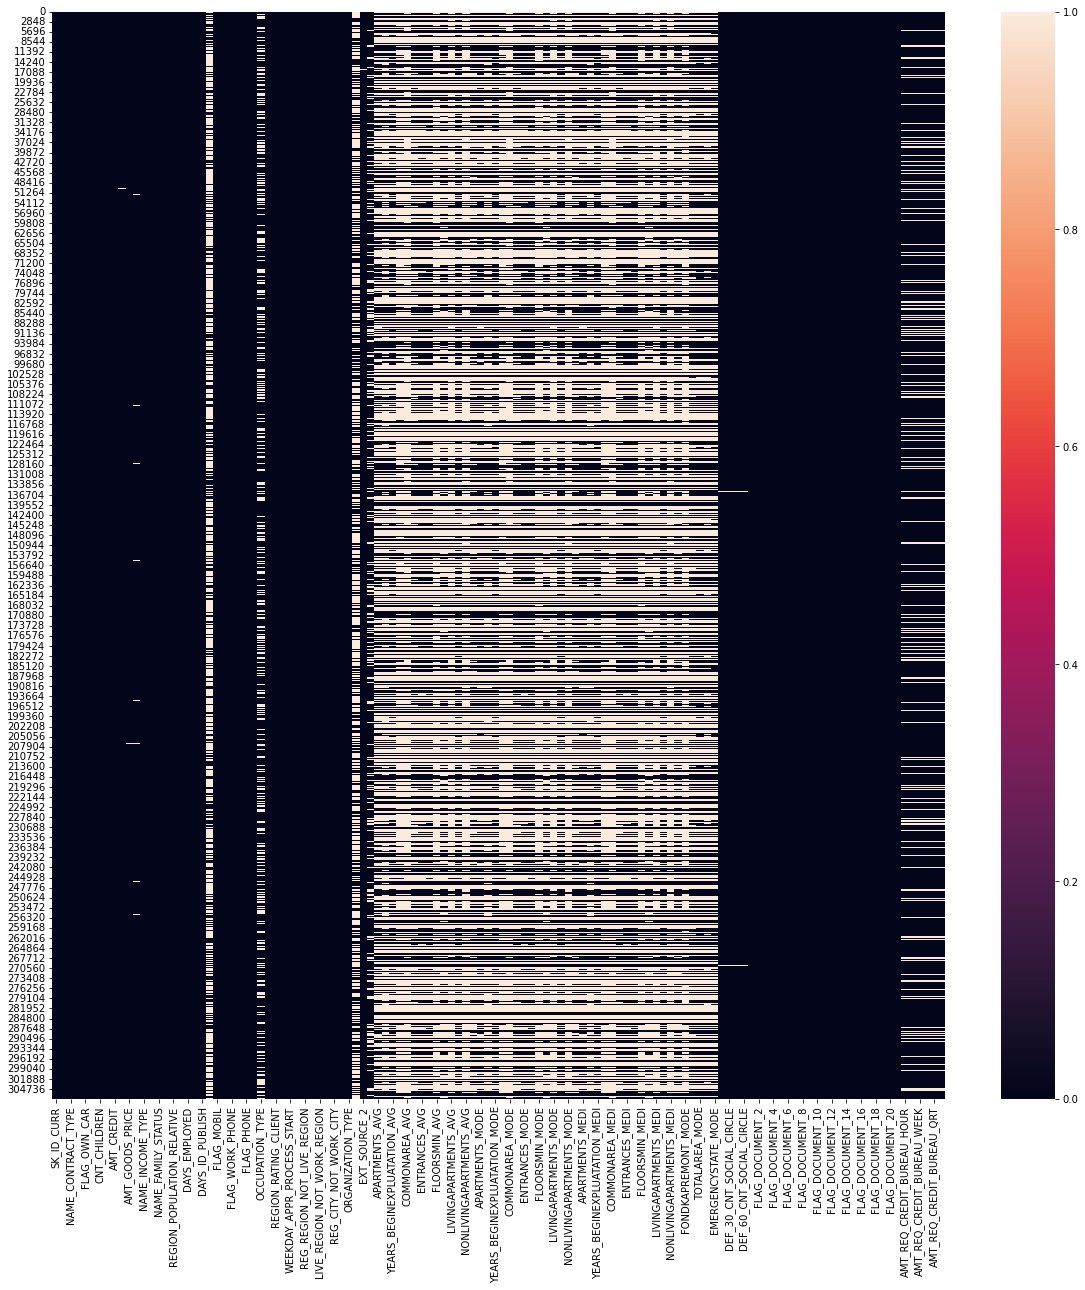

In [26]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine "Application Train" :

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(app_train.isnull())

In [27]:
# Traduction en Pourcentage des Valeurs Manquantes App Test :

missing_count0 = app_test.isnull().sum()

missing_count0

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [28]:
# Traduction en Pourcentage des Valeurs Manquantes App Train :

missing_count1 = app_train.isnull().sum()

missing_count1

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [29]:
# Traduction en Pourcentage des Valeurs Manquantes App Test :

value_count0 = app_test.isnull().count()

value_count0

SK_ID_CURR                    48744
NAME_CONTRACT_TYPE            48744
CODE_GENDER                   48744
FLAG_OWN_CAR                  48744
FLAG_OWN_REALTY               48744
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     48744
AMT_REQ_CREDIT_BUREAU_WEEK    48744
AMT_REQ_CREDIT_BUREAU_MON     48744
AMT_REQ_CREDIT_BUREAU_QRT     48744
AMT_REQ_CREDIT_BUREAU_YEAR    48744
Length: 121, dtype: int64

In [30]:
# Traduction en Pourcentage des Valeurs Manquantes App Train :

value_count1 = app_train.isnull().count()

value_count1

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     307511
AMT_REQ_CREDIT_BUREAU_WEEK    307511
AMT_REQ_CREDIT_BUREAU_MON     307511
AMT_REQ_CREDIT_BUREAU_QRT     307511
AMT_REQ_CREDIT_BUREAU_YEAR    307511
Length: 122, dtype: int64

In [31]:
# Calcul du Pourcentage de Valeurs Manquantes App Test :

missing_percentage0 = round((missing_count0 / value_count0) * 100)

In [32]:
# Calcul du Pourcentage de Valeurs Manquantes App Train :

missing_percentage1 = round((missing_count1 / value_count1) * 100)

In [33]:
# Dataframe des Pourcentages de NaN Application Test :

missing_df_application_test = pd.DataFrame({'Nombre' : missing_count0, 'Pourcentage' : missing_percentage0})

In [34]:
# Dataframe "Missing_df" Application Test :

missing_df_application_test

,Nombre,Pourcentage
SK_ID_CURR,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,6049,12.0
AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.0
AMT_REQ_CREDIT_BUREAU_MON,6049,12.0
AMT_REQ_CREDIT_BUREAU_QRT,6049,12.0


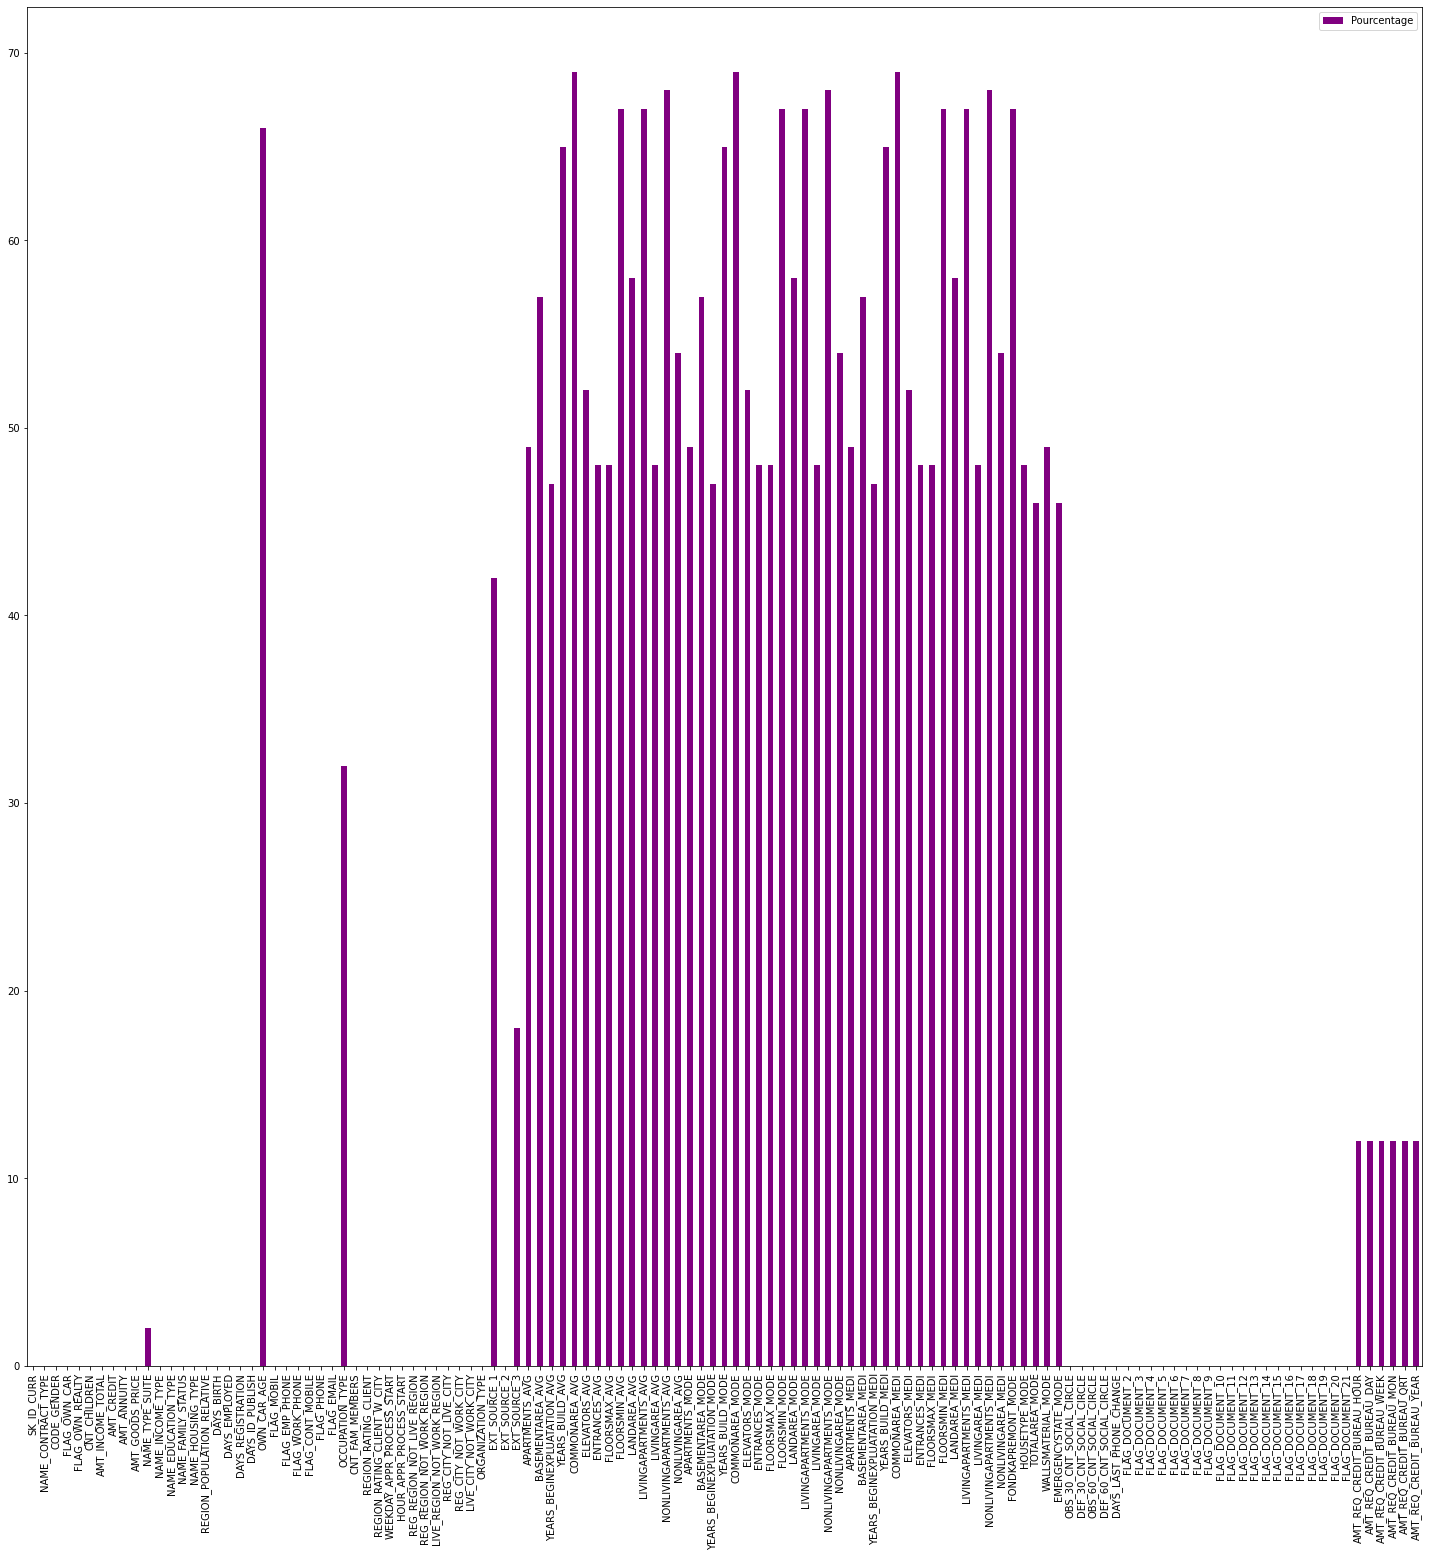

In [35]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables App Test :

plt.rcParams["figure.figsize"] = (25,25)

barchart = missing_df_application_test.plot.bar(y='Pourcentage', color = 'Purple')

In [36]:
# Dataframe des Pourcentages de NaN Application Train :

missing_df_application_train = pd.DataFrame({'Nombre' : missing_count1, 'Pourcentage' : missing_percentage1})

In [37]:
# Dataframe "Missing_df" Application Train :

missing_df_application_train

,Nombre,Pourcentage
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,14.0
AMT_REQ_CREDIT_BUREAU_WEEK,41519,14.0
AMT_REQ_CREDIT_BUREAU_MON,41519,14.0
AMT_REQ_CREDIT_BUREAU_QRT,41519,14.0


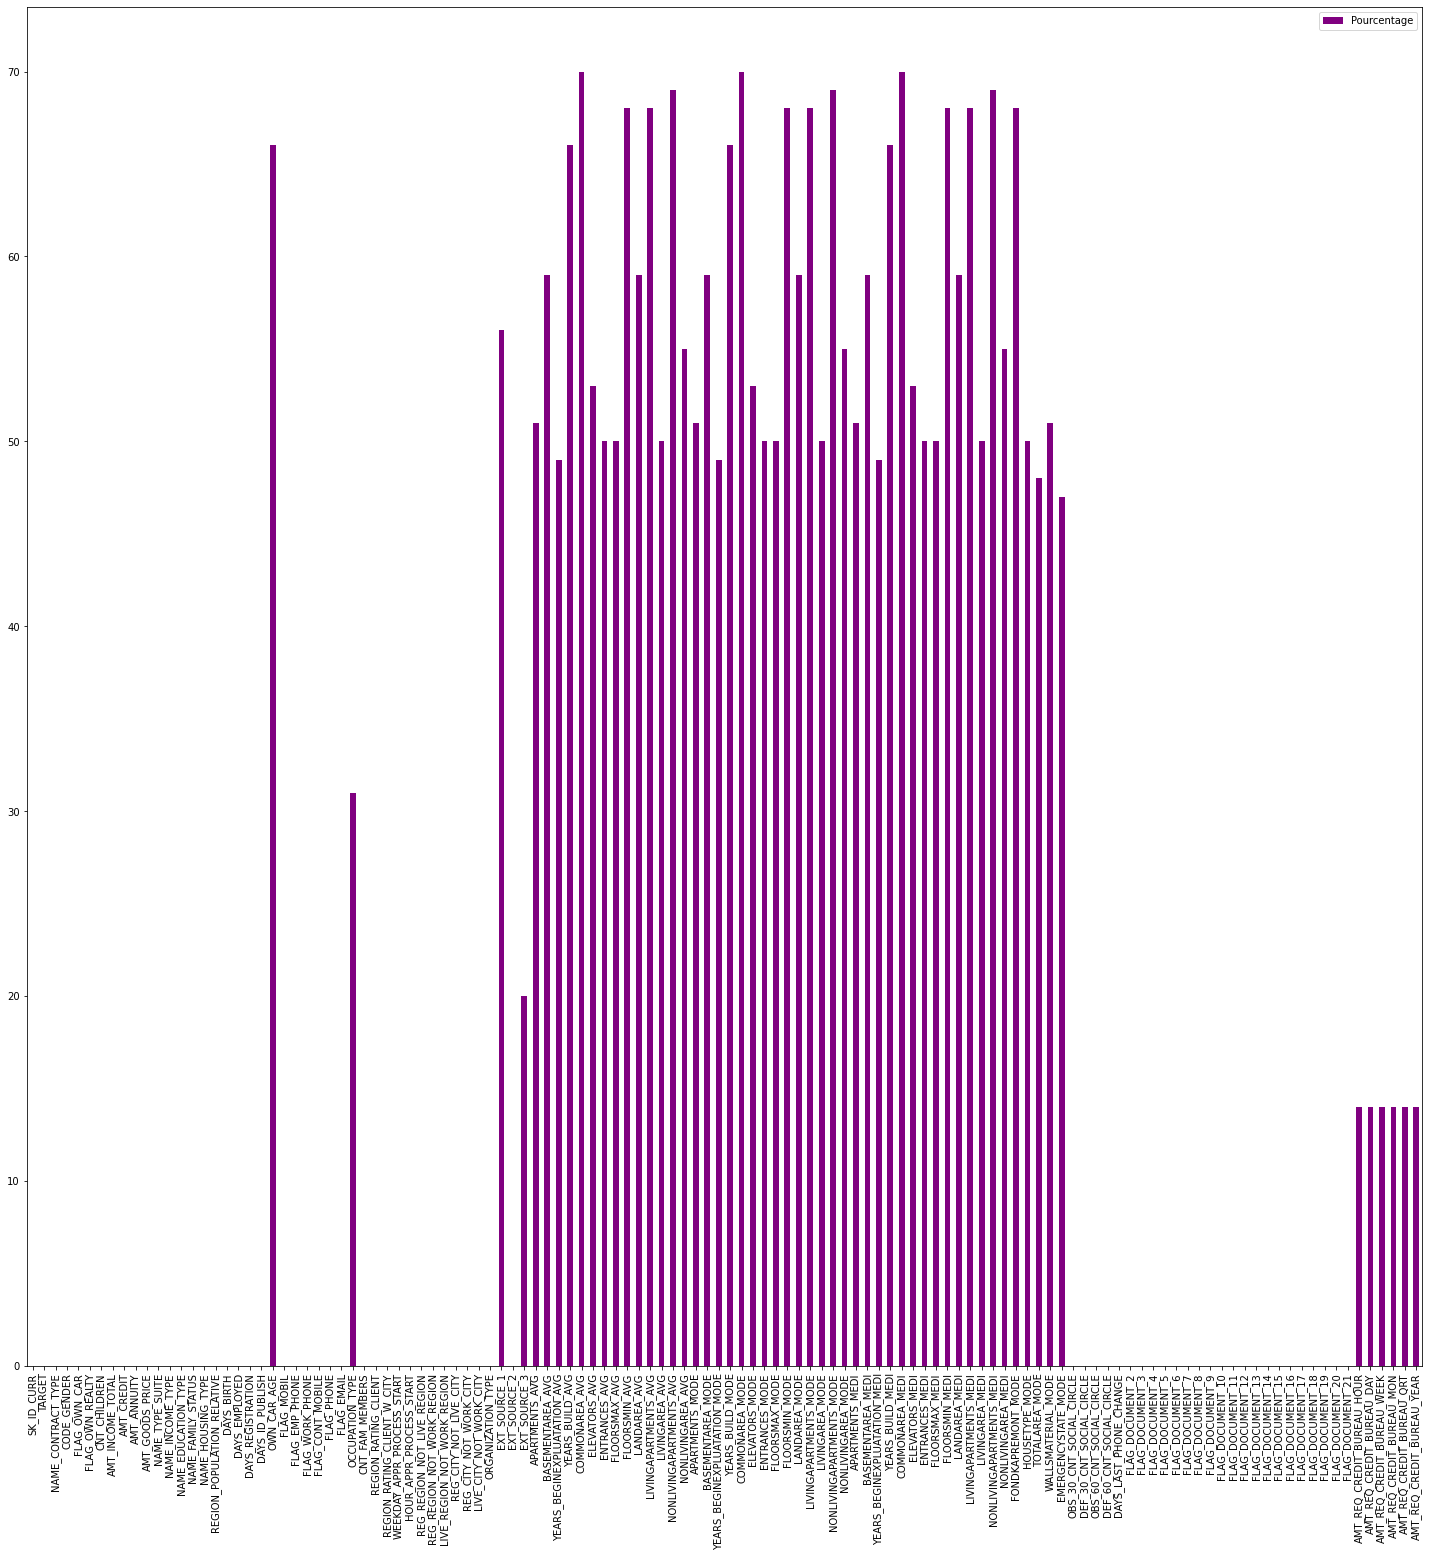

In [38]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables App Train :

plt.rcParams["figure.figsize"] = (25,25)

barchart = missing_df_application_train.plot.bar(y='Pourcentage', color = 'Purple')

# C- OUTLIERS :

In [39]:
# Outliers : DAYS BIRTH : App Test :

(app_test['DAYS_BIRTH']).describe()

count    48744.000000
mean    -16068.084605
std       4325.900393
min     -25195.000000
25%     -19637.000000
50%     -15785.000000
75%     -12496.000000
max      -7338.000000
Name: DAYS_BIRTH, dtype: float64

In [40]:
# Outliers : DAYS BIRTH : App Train :

(app_train['DAYS_BIRTH']).describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [41]:
# Outliers : DAYS BIRTH : App Test :

(app_test['DAYS_BIRTH']/-365).describe()

count    48744.000000
mean        44.022150
std         11.851782
min         20.104110
25%         34.235616
50%         43.246575
75%         53.800000
max         69.027397
Name: DAYS_BIRTH, dtype: float64

In [42]:
# Outliers : DAYS BIRTH : App Train :

(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [43]:
# Outliers : DAYS EMPLOYED : App Test :

app_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [44]:
# Outliers : DAYS EMPLOYED : App Train :

app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employed')

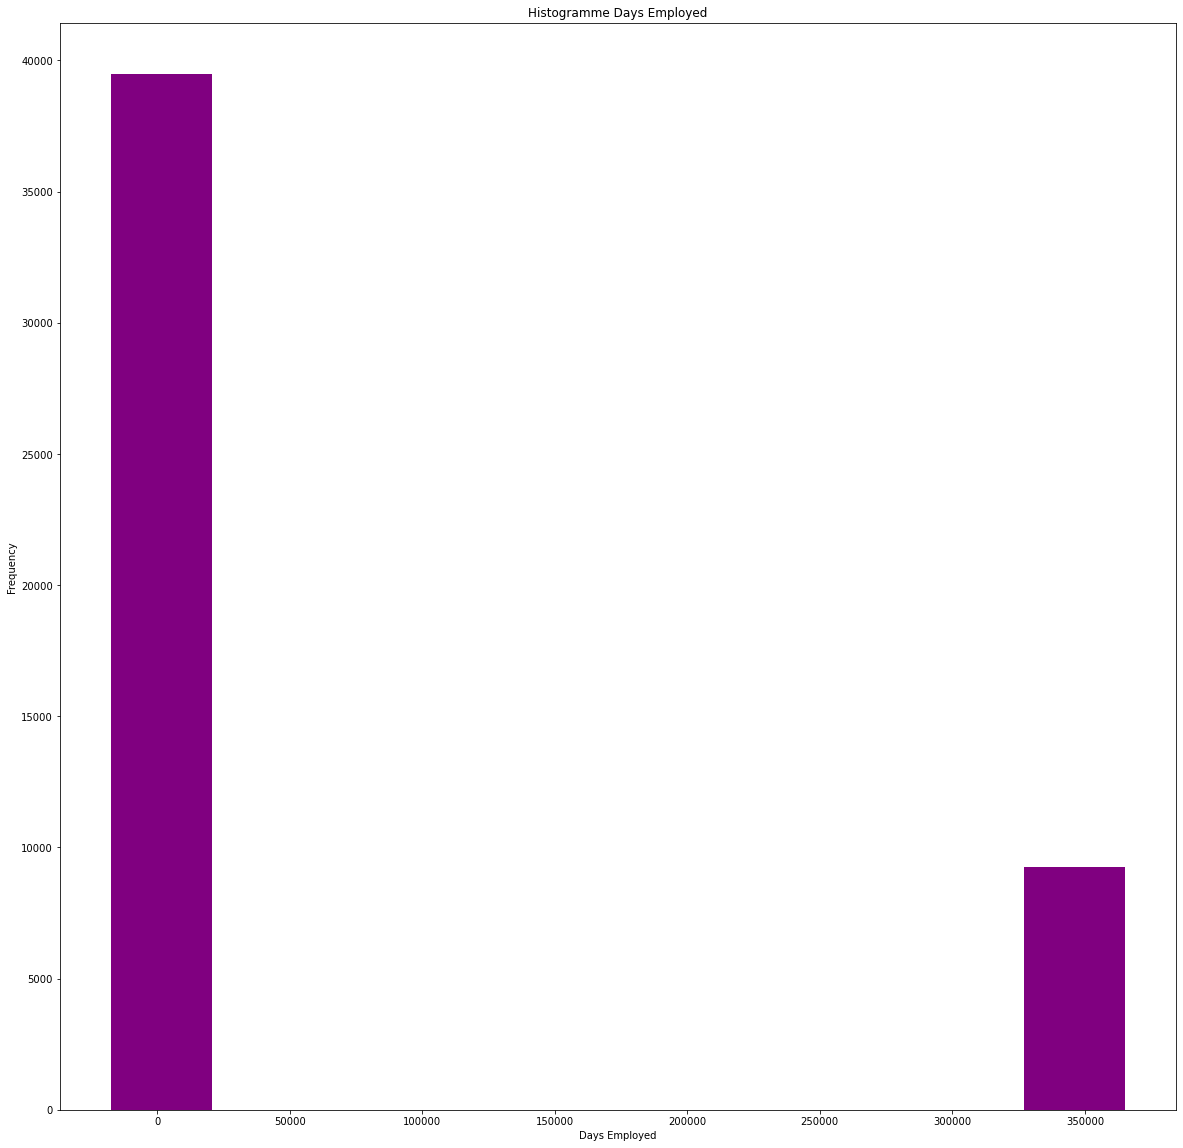

In [45]:
# Histogramme DAYS EMPLOYED : App Test :

app_test['DAYS_EMPLOYED'].plot.hist(color = 'Purple', title = 'Histogramme Days Employed', figsize = (20,20))

plt.xlabel('Days Employed')

# Interprétation :

- On constate une valeur très élevée, de 350000 environ, qu'il va falloir traiter.

Text(0.5, 0, 'Days Employed')

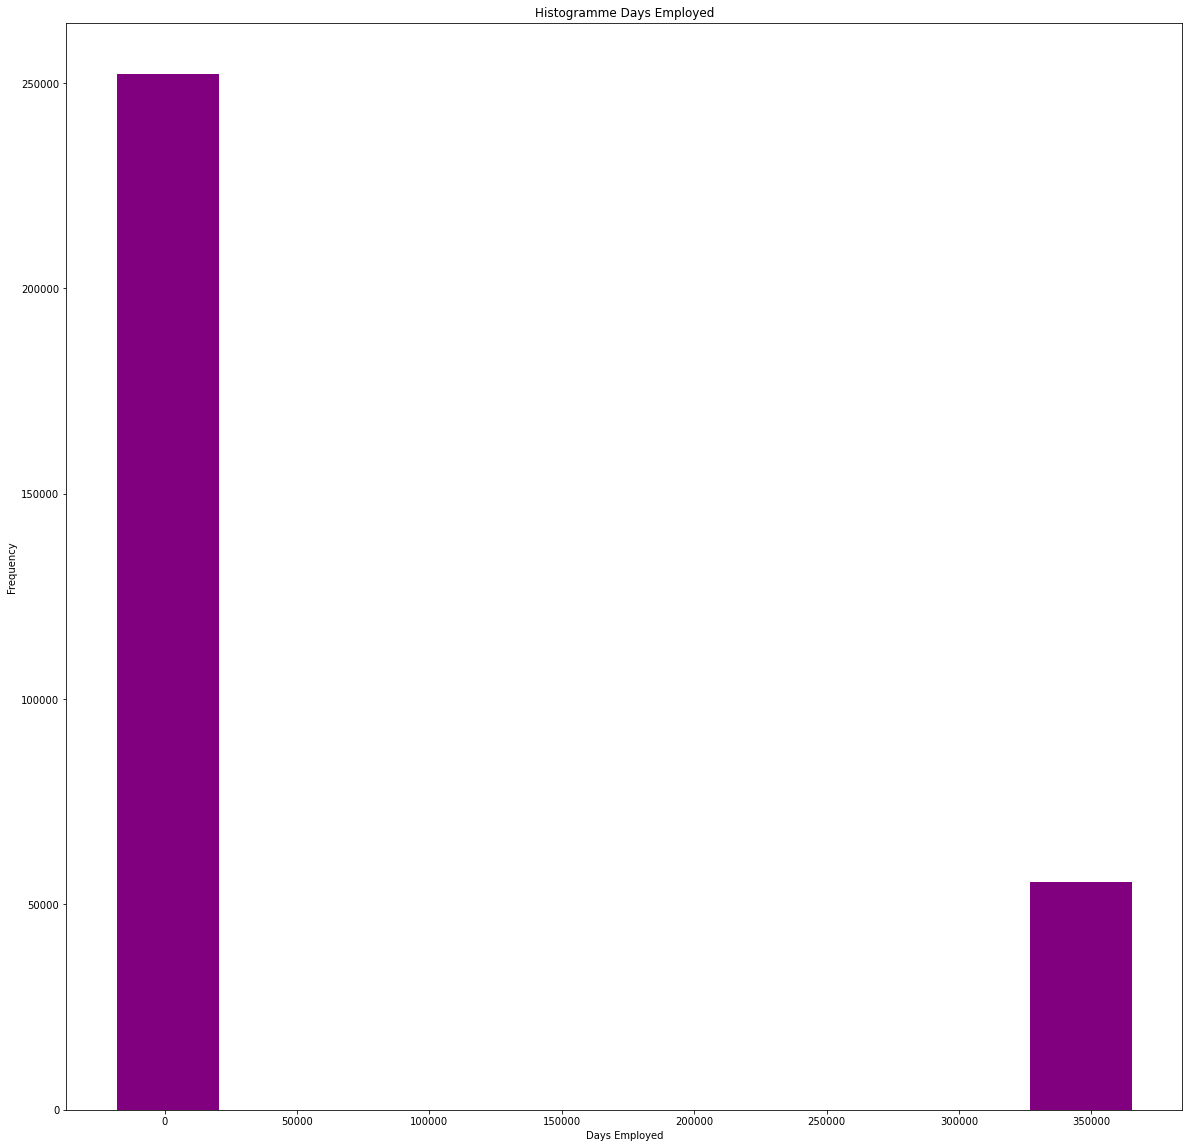

In [46]:
# Histogramme DAYS EMPLOYED : App Train :

app_train['DAYS_EMPLOYED'].plot.hist(color = 'Purple', title = 'Histogramme Days Employed', figsize = (20,20))

plt.xlabel('Days Employed')

Text(0.5, 0, 'Days Employed')

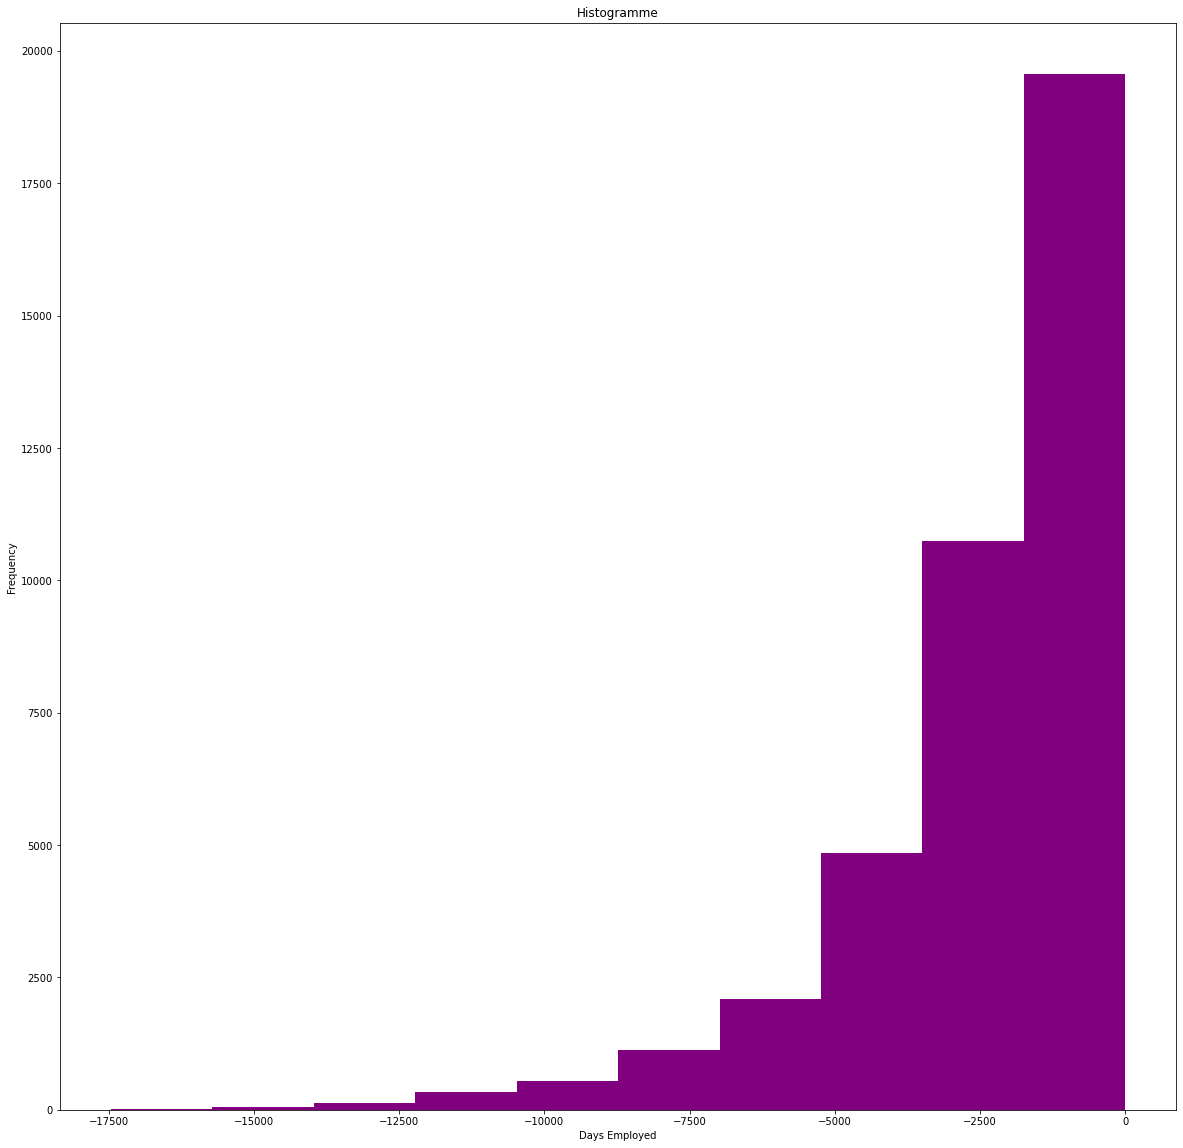

In [47]:
# Outliers : Anomalies : App Test :

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243

app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_test['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme', color = 'Purple', figsize = (20,20))

plt.xlabel('Days Employed')

Text(0.5, 0, 'Days Employed')

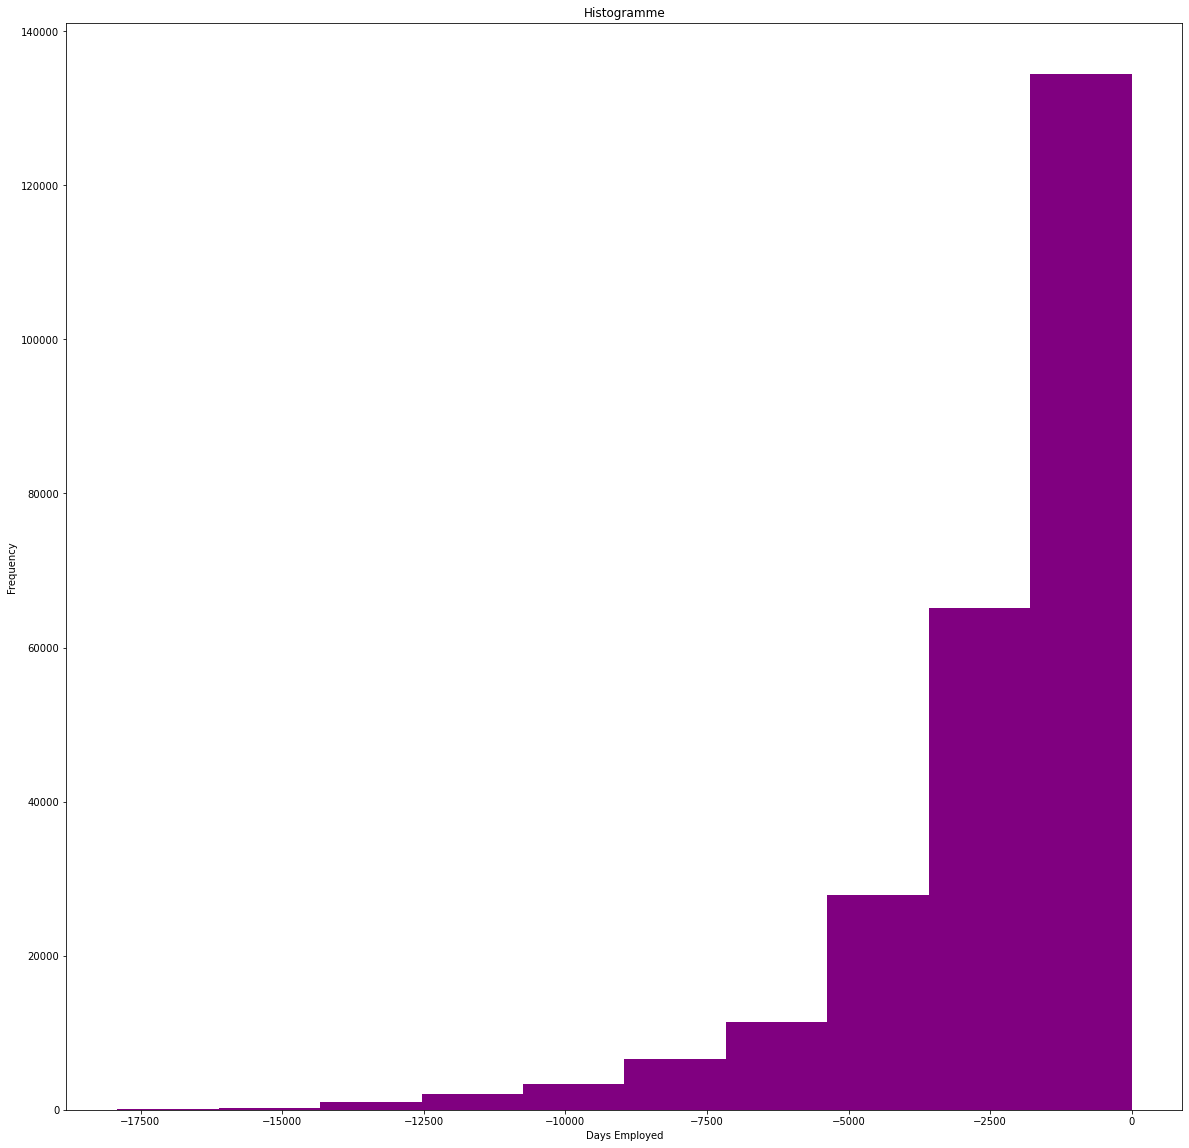

In [48]:
# Outliers : Anomalies : App Train :

app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme', color = 'Purple', figsize = (20,20))

plt.xlabel('Days Employed')

In [49]:
# Corrélations Application Train :

correlations = app_train.corr()['TARGET'].sort_values()

In [50]:
# Présentation des Corrélations :

print('Dernières Corrélations Positives:\n', correlations.tail(5))

Dernières Corrélations Positives:
 REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


In [51]:
# Présentation des Corrélations :

print('Premières Corrélations Négatives:\n', correlations.head(5))

Premières Corrélations Négatives:
 EXT_SOURCE_3         -0.178919
EXT_SOURCE_2         -0.160472
EXT_SOURCE_1         -0.155317
DAYS_EMPLOYED_ANOM   -0.045987
FLOORSMAX_AVG        -0.044003
Name: TARGET, dtype: float64


# Interprétation :

- Les Coefficients de Corrélations présentent des Valeurs différentes.

# D- COMPREHENSION DES VARIABLES : Fichier APP_TRAIN :

# AGE DES EMPRUNTEURS :

In [52]:
# Répartition des Individus selon l'Age :

age = (app_train['DAYS_BIRTH']/-365)

Text(0, 0.5, 'Quantification')

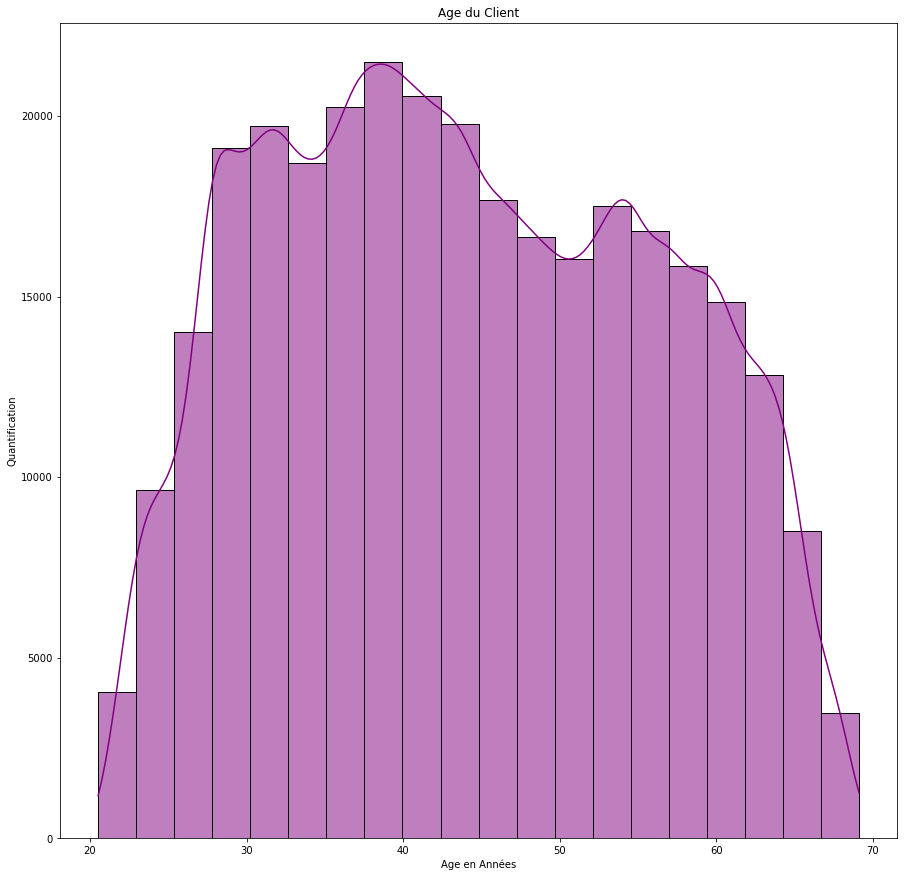

In [53]:
# Histogramme et Distribution :

plt.figure(figsize=(15,15))

sns.histplot(data=age, bins=20, kde=True, color = 'Purple')

plt.title('Age du Client')

plt.xlabel('Age en Années')
    
plt.ylabel('Quantification')

# Interprétation :

- L'Age médian se situe autour de 35-40 ans.

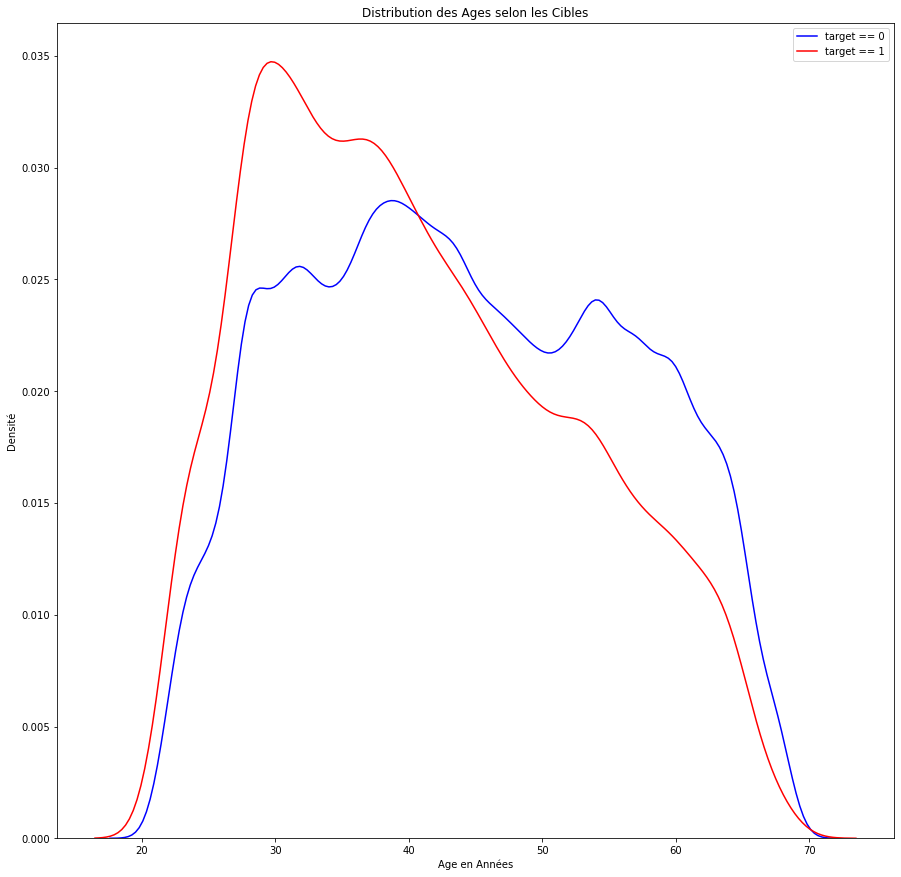

In [54]:
# Distribution de l'Age en fonction de la Cible : Bon Payeur / Mauvais Payeur :

plt.figure(figsize = (15, 15))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / - 365, label = 'target == 0', color='blue')

sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / - 365, label = 'target == 1', color='red')

plt.xlabel('Age en Années')

plt.ylabel('Densité')

plt.title('Distribution des Ages selon les Cibles')

plt.legend(loc="upper right", frameon=True)

# TYPE DE CONTRAT :

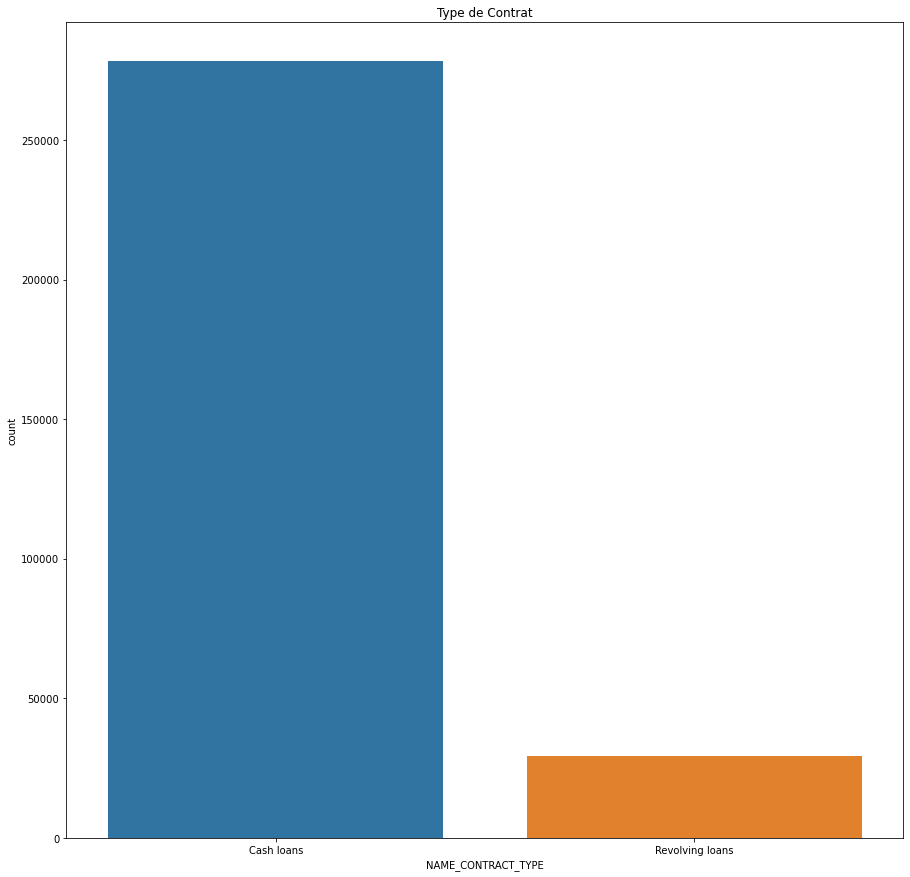

In [55]:
# Quantification des Clients selon le Type de Contrat :

plt.figure(figsize = (15, 15))

sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_train, order = app_train['NAME_CONTRACT_TYPE'].value_counts().index)

plt.title('Type de Contrat')

plt.show()

# Interprétation :

- Le Cash loan est majoritaire.

# ROLE DES VARIABLES EXTERIEURES :

In [56]:
# Extraction et Corrélation :

ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

ext_data_corr = ext_data.corr()

ext_data_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


Text(0.5, 1.0, 'Heatmap de Corrélation')

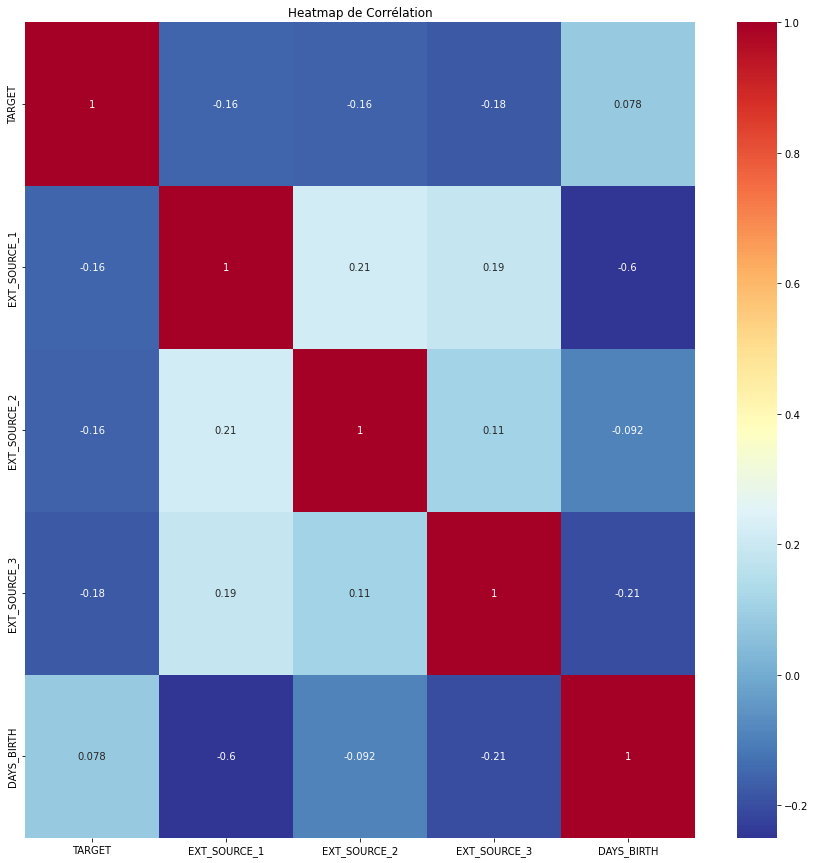

In [57]:
# Heatmap des Corrélations :

plt.figure(figsize = (15, 15))

sns.heatmap(ext_data_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True)

plt.title('Heatmap de Corrélation')

# GENRE DES EMPRUNTEURS :

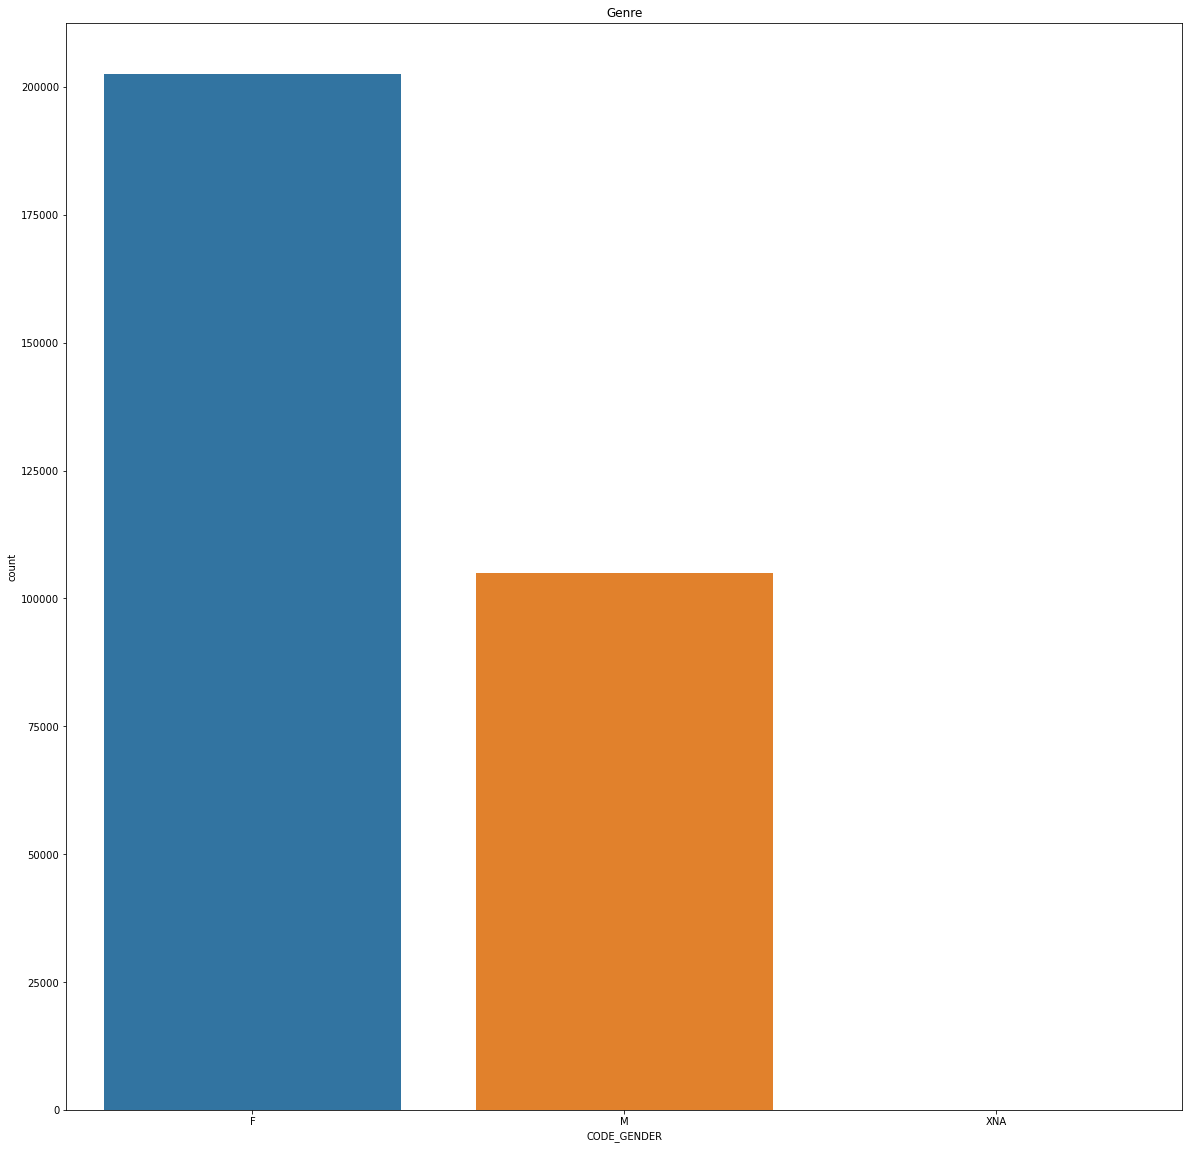

In [58]:
# Quantification des Clients selon le Genre :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'CODE_GENDER', data = app_train, order = app_train['CODE_GENDER'].value_counts().index)

plt.title('Genre')

plt.show()

# Interprétation :

- Les Emprunteurs sont en majorité des Femmes.

# MOYEN DE LOCOMOTION DES EMPRUNTEURS :

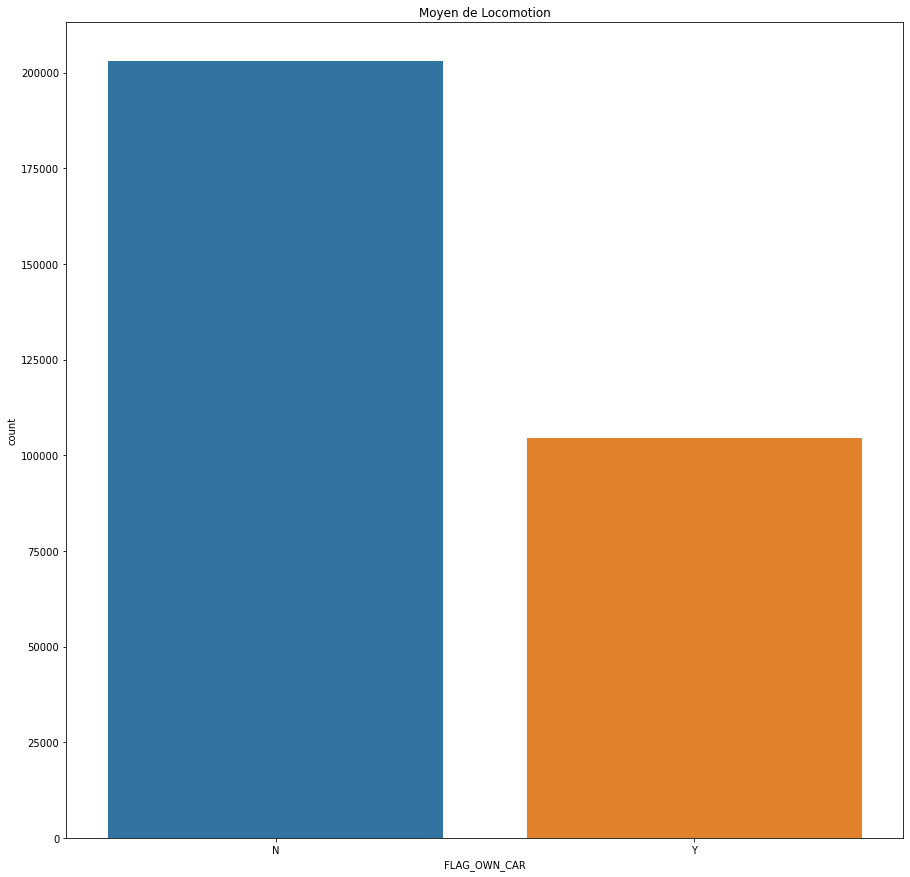

In [59]:
# Quantification des Clients selon le Moyen de Locomotion :

plt.figure(figsize = (15, 15))

sns.countplot(x = 'FLAG_OWN_CAR', data = app_train, order = app_train['FLAG_OWN_CAR'].value_counts().index)

plt.title('Moyen de Locomotion')

plt.show()

# Interprétation :

- Les Emprunteurs ne possèdent pas de véhicule, en majorité.

# SITUATION FAMILIALE DES EMPRUNTEURS :

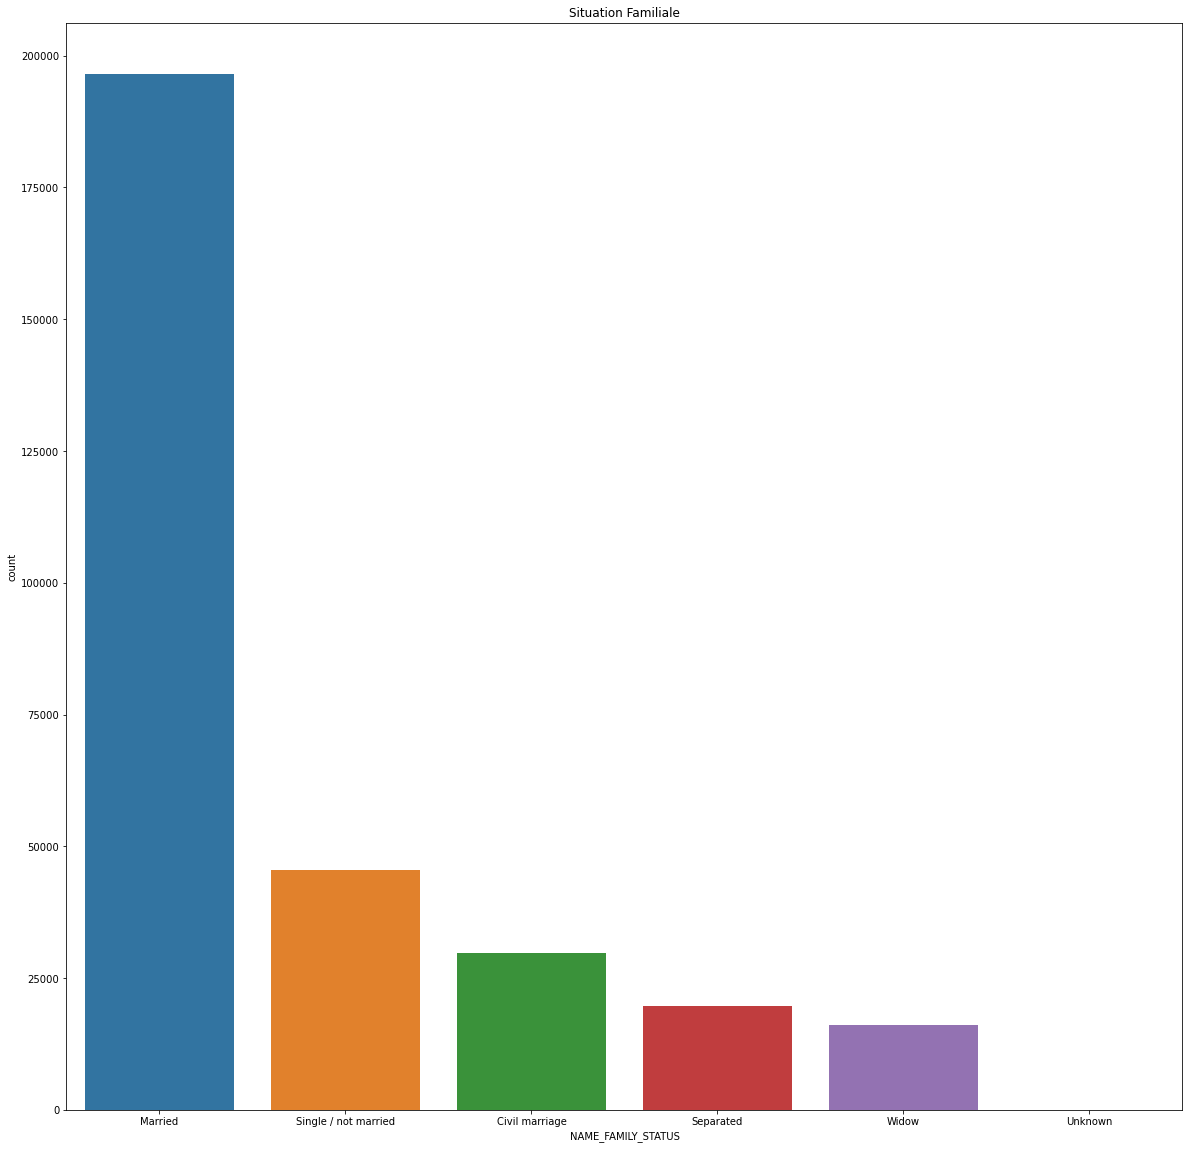

In [60]:
# Quantification des Clients selon le Type de Situation Familiale :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_train, order = app_train['NAME_FAMILY_STATUS'].value_counts().index)

plt.title('Situation Familiale')

plt.show()

# Interprétation :

- Les Emprunteurs sont en majorité, mariés.

# REPARTITION DU NOMBRE D'ENFANTS DES EMPRUNTEURS:

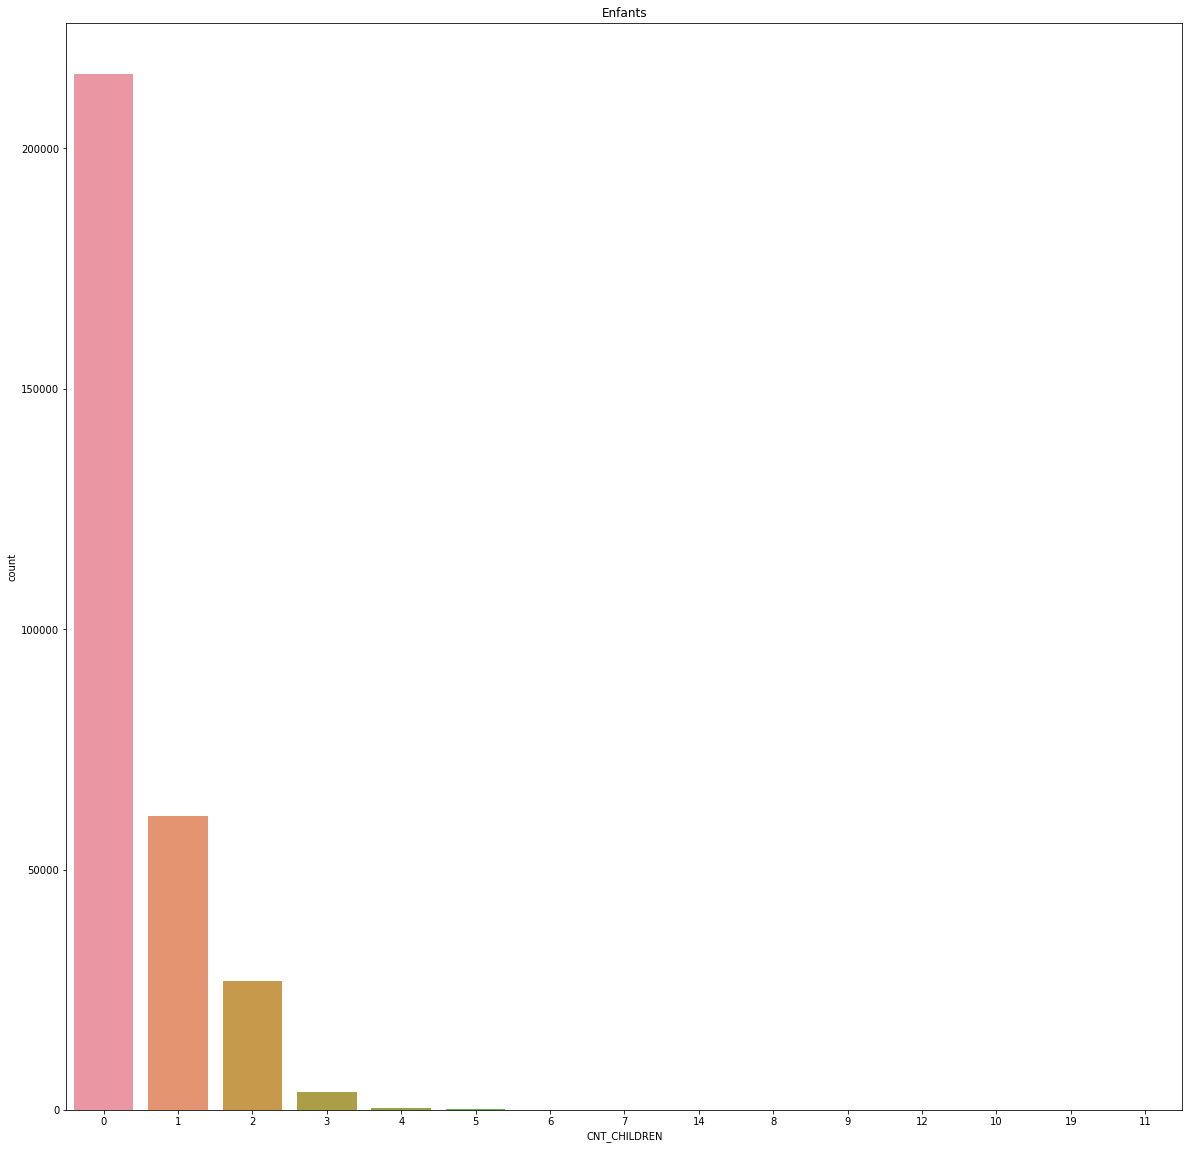

In [61]:
# Quantification des Clients selon le Nombre d'Enfants :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'CNT_CHILDREN', data = app_train, order = app_train['CNT_CHILDREN'].value_counts().index)

plt.title('Enfants')

plt.show()

# Interprétation :

- Les Emprunteurs n'ont pas d'enfants, majoritairement.

# TYPE DE REVENUS DES EMPRUNTEURS :

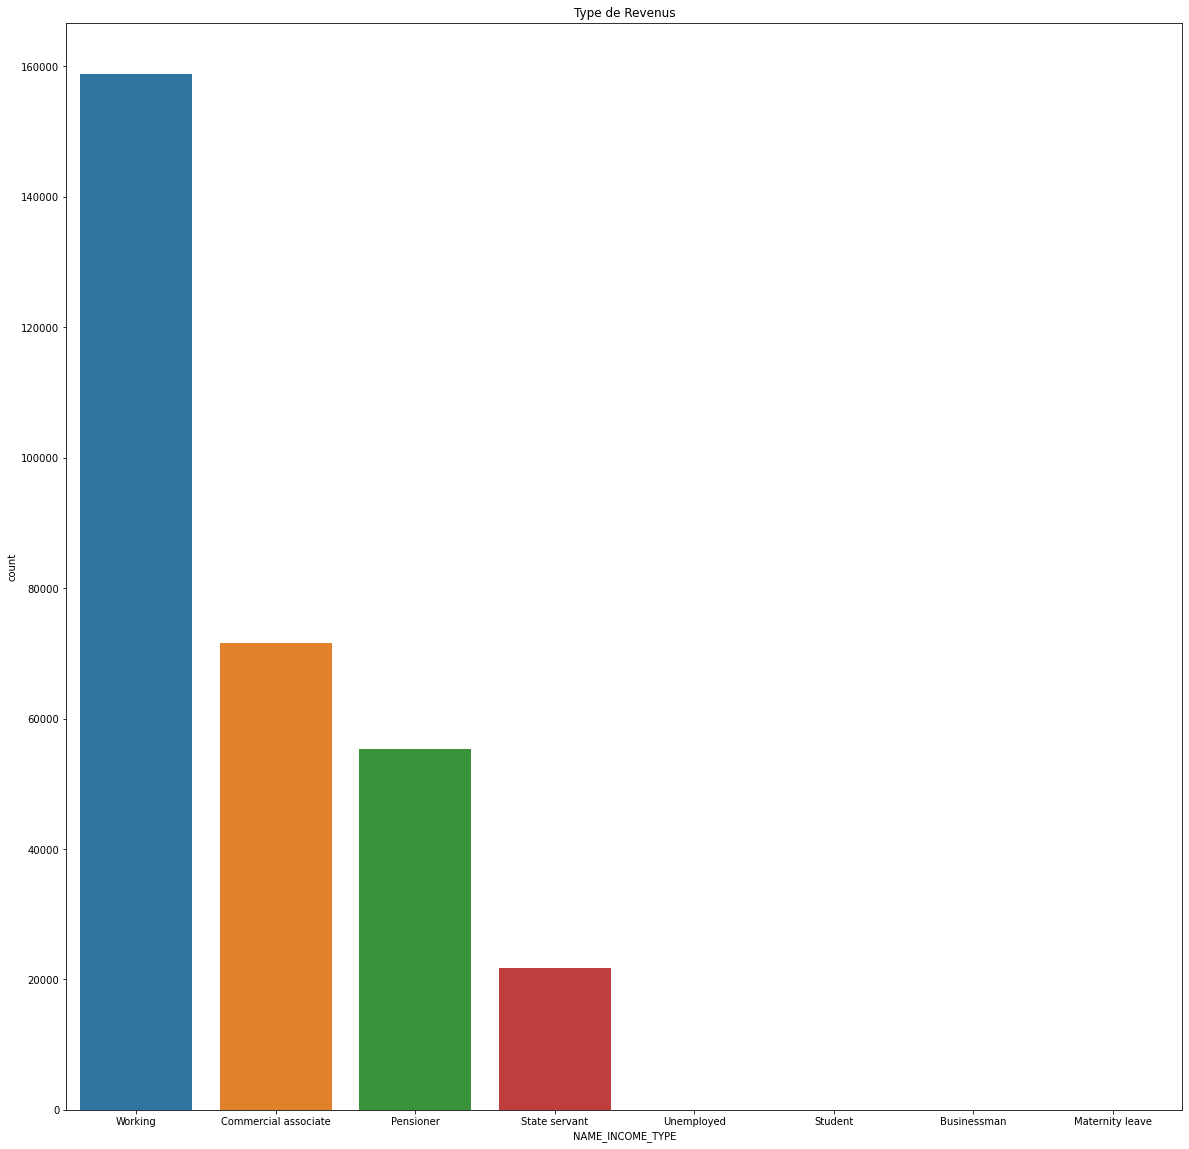

In [62]:
# Quantification des Clients selon le Type de Revenus :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'NAME_INCOME_TYPE', data = app_train, order = app_train['NAME_INCOME_TYPE'].value_counts().index)

plt.title('Type de Revenus')

plt.show()

# Interprétation :

- Les Emprunteurs, en majorité, ont une activité professionnelle.

# TYPE D'OCCUPATION DES EMPRUNTEURS :

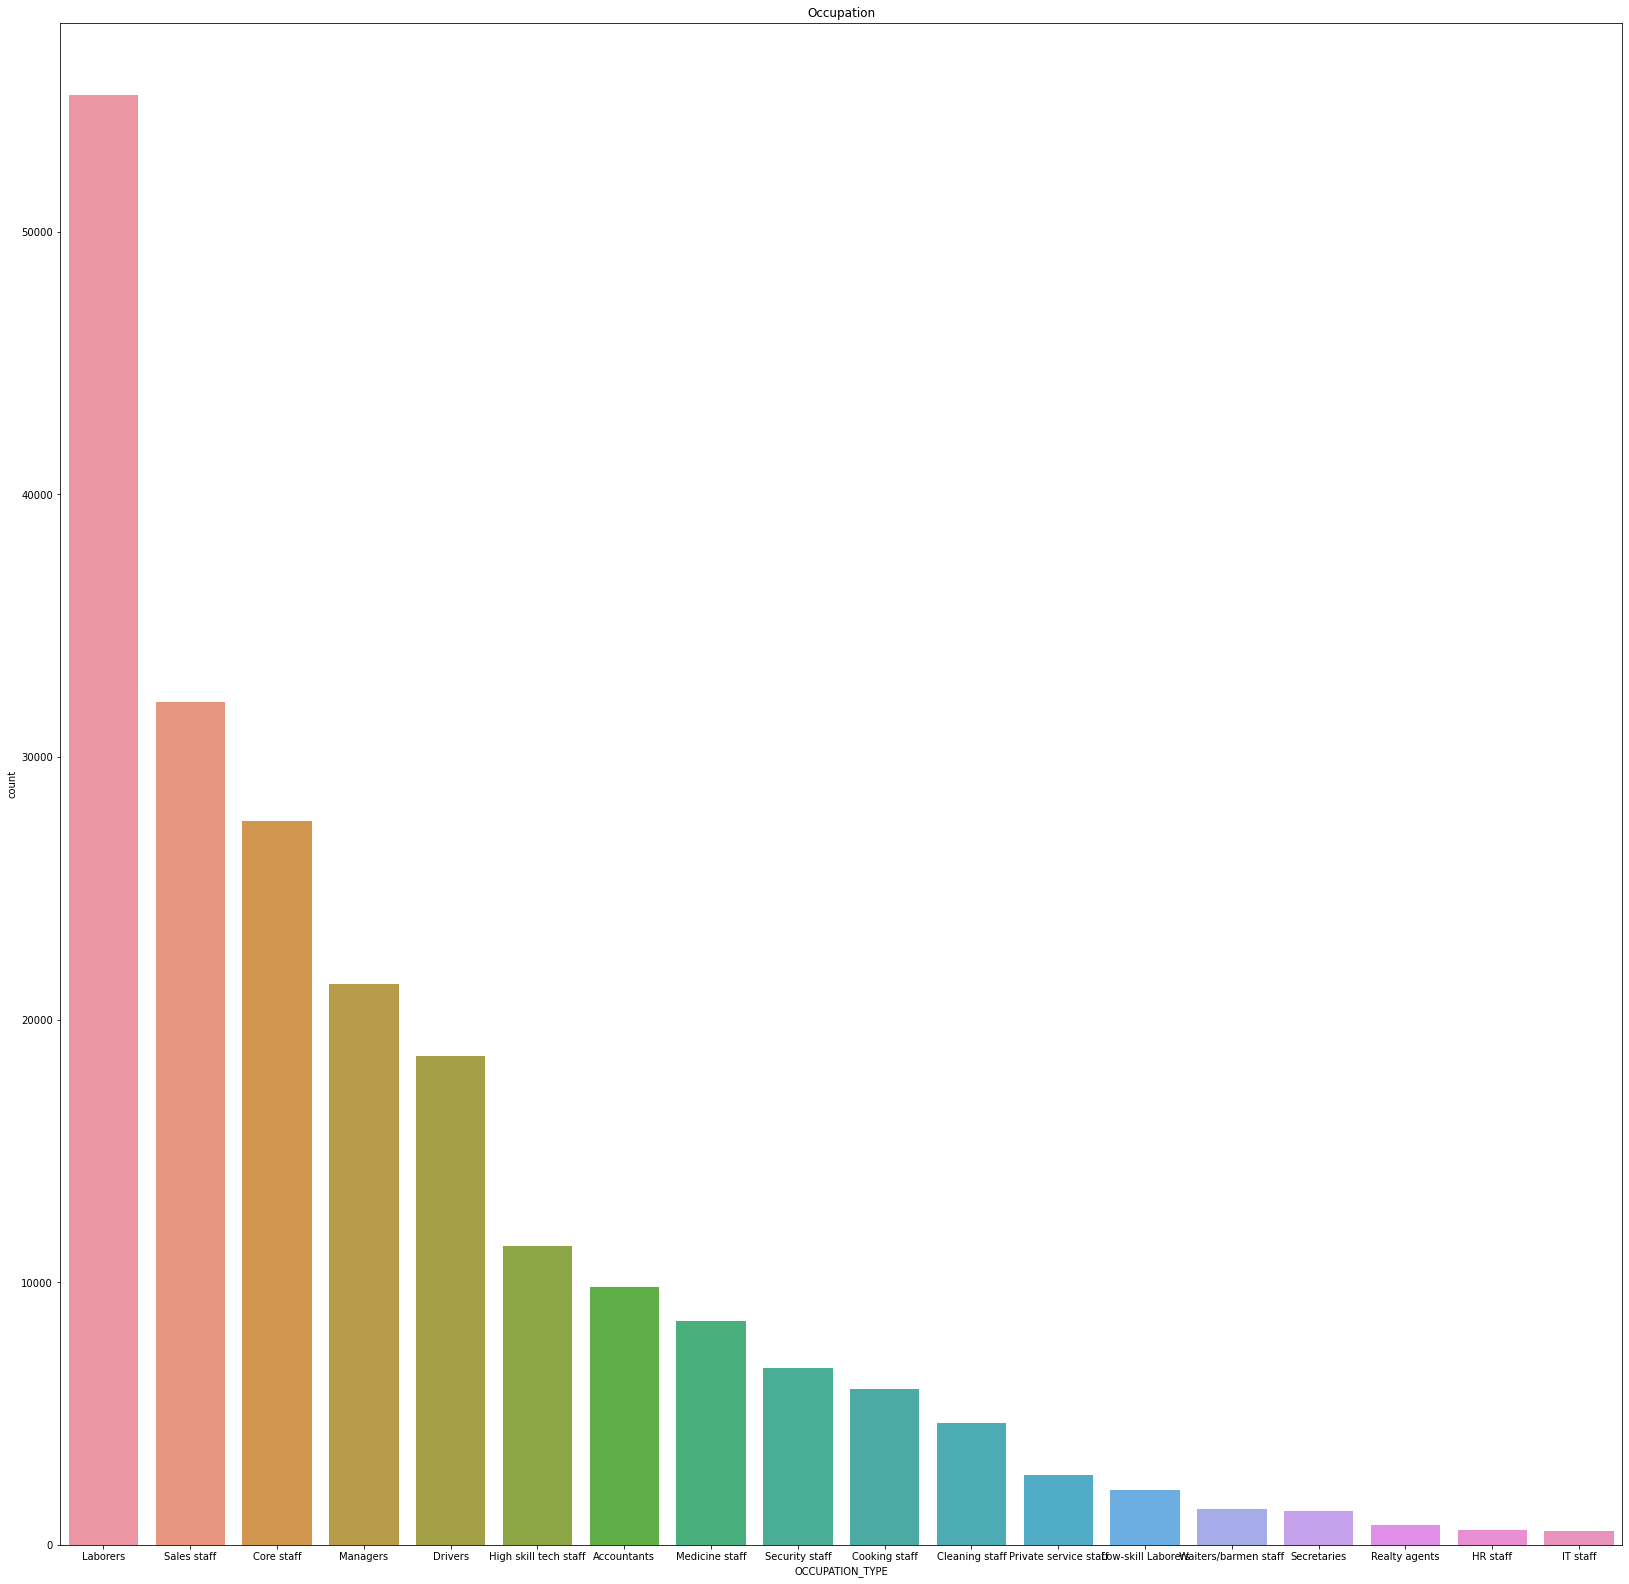

In [63]:
# Quantification des Clients selon le Type d'Occupation :

plt.figure(figsize = (28, 28))

sns.countplot(x = 'OCCUPATION_TYPE', data = app_train, order = app_train['OCCUPATION_TYPE'].value_counts().index)

plt.title('Occupation')

plt.show()

# Interprétation :

- Les Emprunteurs sont en majorité, des Ouvriers.

# TYPE D'EDUCATION DES EMPRUNTEURS :

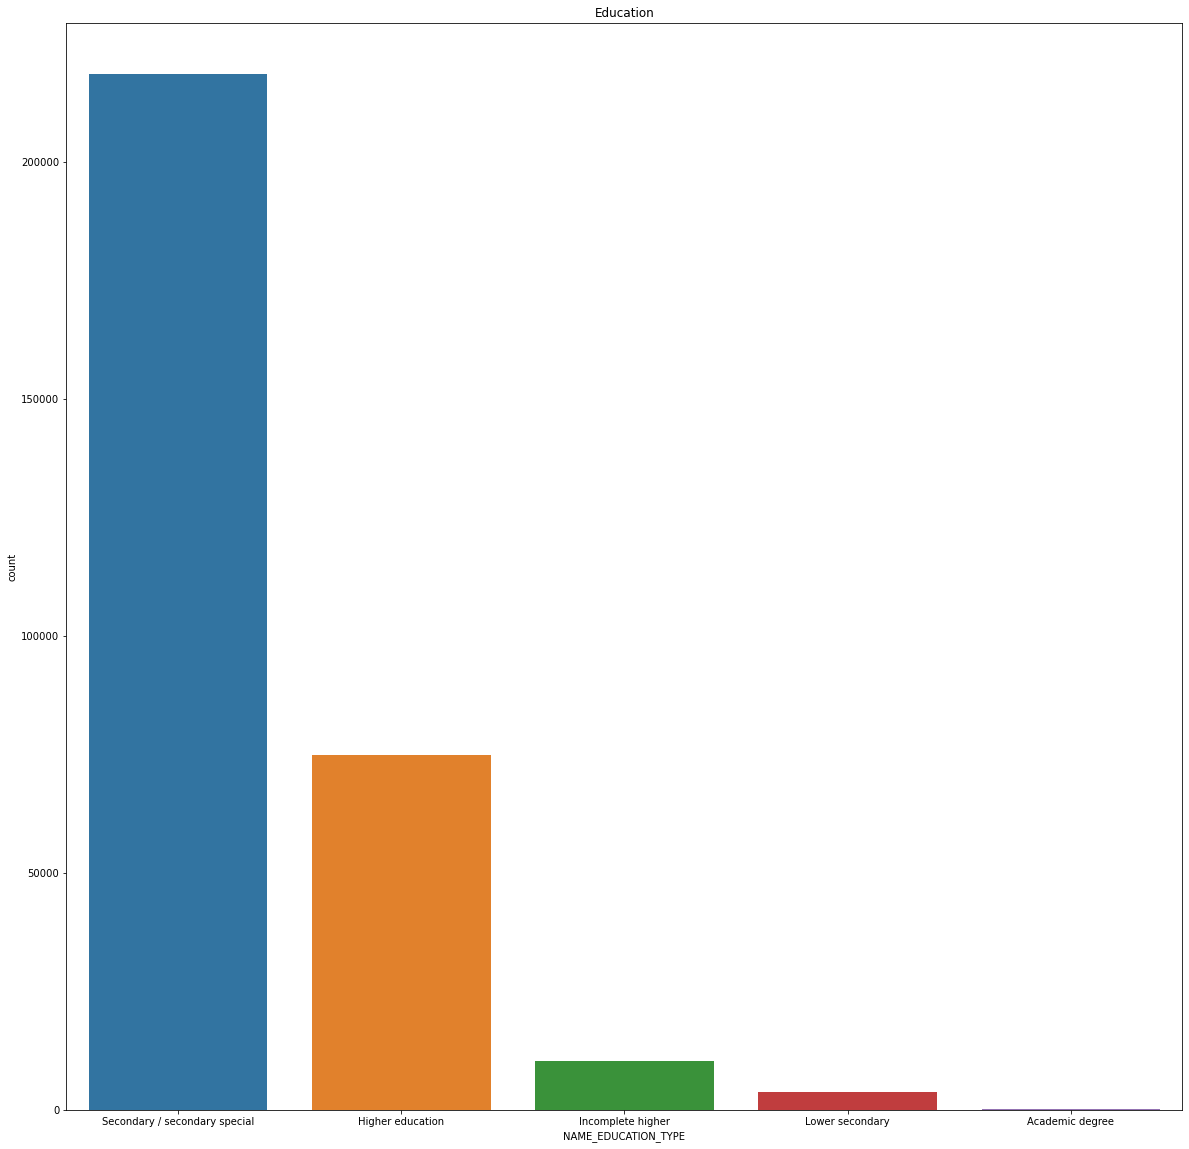

In [64]:
# Quantification des Clients selon le Type d'Education :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_train, order = app_train['NAME_EDUCATION_TYPE'].value_counts().index)

plt.title('Education')

plt.show()

# Interprétation :

- La majorité des Emprunteurs sont allés au Lycée.

# E- UN PEU DE FEATURE ENGINEERING :

# VARIABLES EXISTANTES :

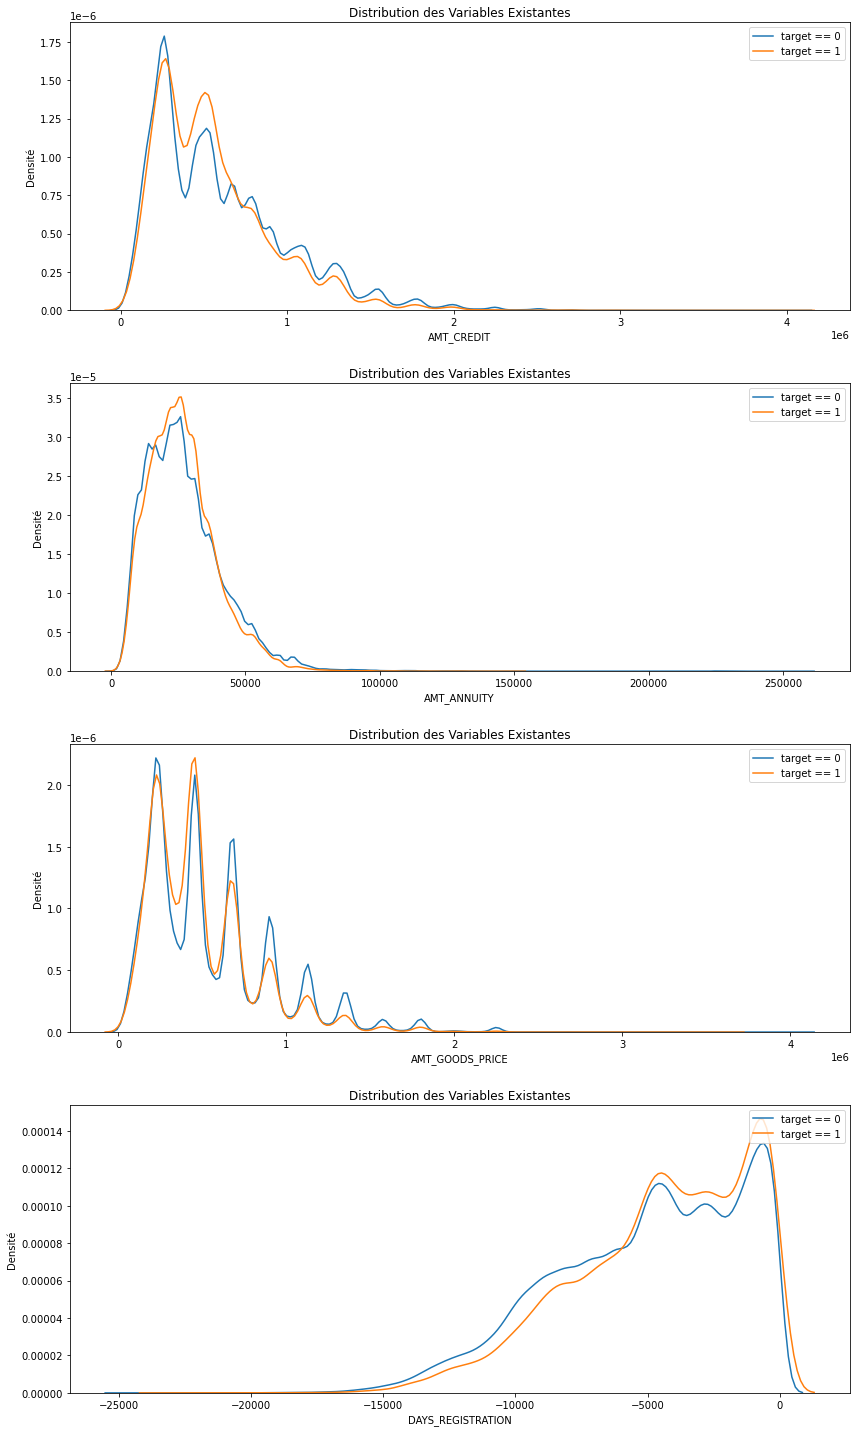

In [65]:
# Itération et Plot :

plt.figure(figsize = (12, 20))

for i, feature in enumerate(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION']):
    
    plt.subplot(4, 1, i + 1)

    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, feature], label = 'target == 0')

    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution des Variables Existantes')
    
    plt.xlabel('%s' % feature)
    
    plt.ylabel('Densité')
    
    plt.legend(loc="upper right", frameon=True)
    
plt.tight_layout(h_pad = 2.5)

# BETA - Lecture Fichier "BUREAU" :

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon). Pour chaque prêt de notre échantillon, il y a autant de lignes que de nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

In [66]:
# Bureau Data :
    
bureau = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/bureau.csv', error_bad_lines=False)

/var/folders/_5/v63wfks92ynb3p2nthszhh2m0000gn/T/ipykernel_15524/4267402084.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





# A- MISE EN EVIDENCE :

In [67]:
# Nombre de Lignes et de Colonnes :

nRow, nCol = bureau.shape

print(f'Le dataset contient {nRow} Lignes et {nCol} Colonnes.')

Le dataset contient 1716428 Lignes et 17 Colonnes.


In [68]:
# Visualisation :

bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


# B- MERGING :

In [69]:
# Fusion :

office = app_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [70]:
# Visualisation :

office.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


# C- COMPREHENSION DES VARIABLES : DATASET OFFICE :

# STATUT DU CREDIT :

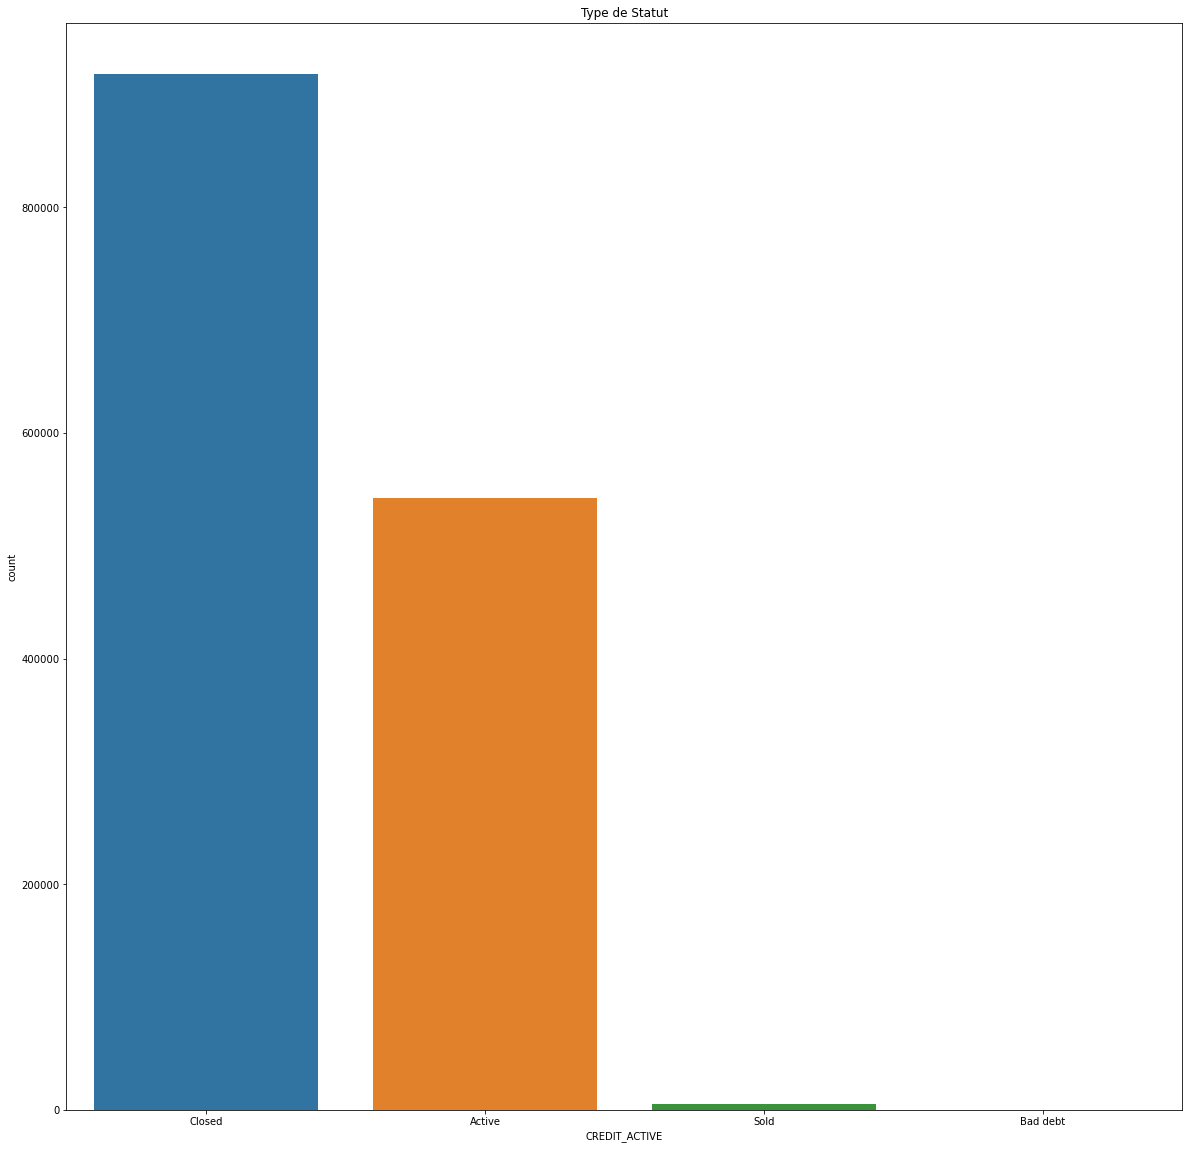

In [71]:
# Quantification selon le Statut du Crédit :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'CREDIT_ACTIVE', data = office, order = office['CREDIT_ACTIVE'].value_counts().index)

plt.title('Type de Statut')

plt.show()

# Interprétation :

- Les Emprunts des Clients, dans leur majorité, ont été remboursés.

# "CURRENCY" :

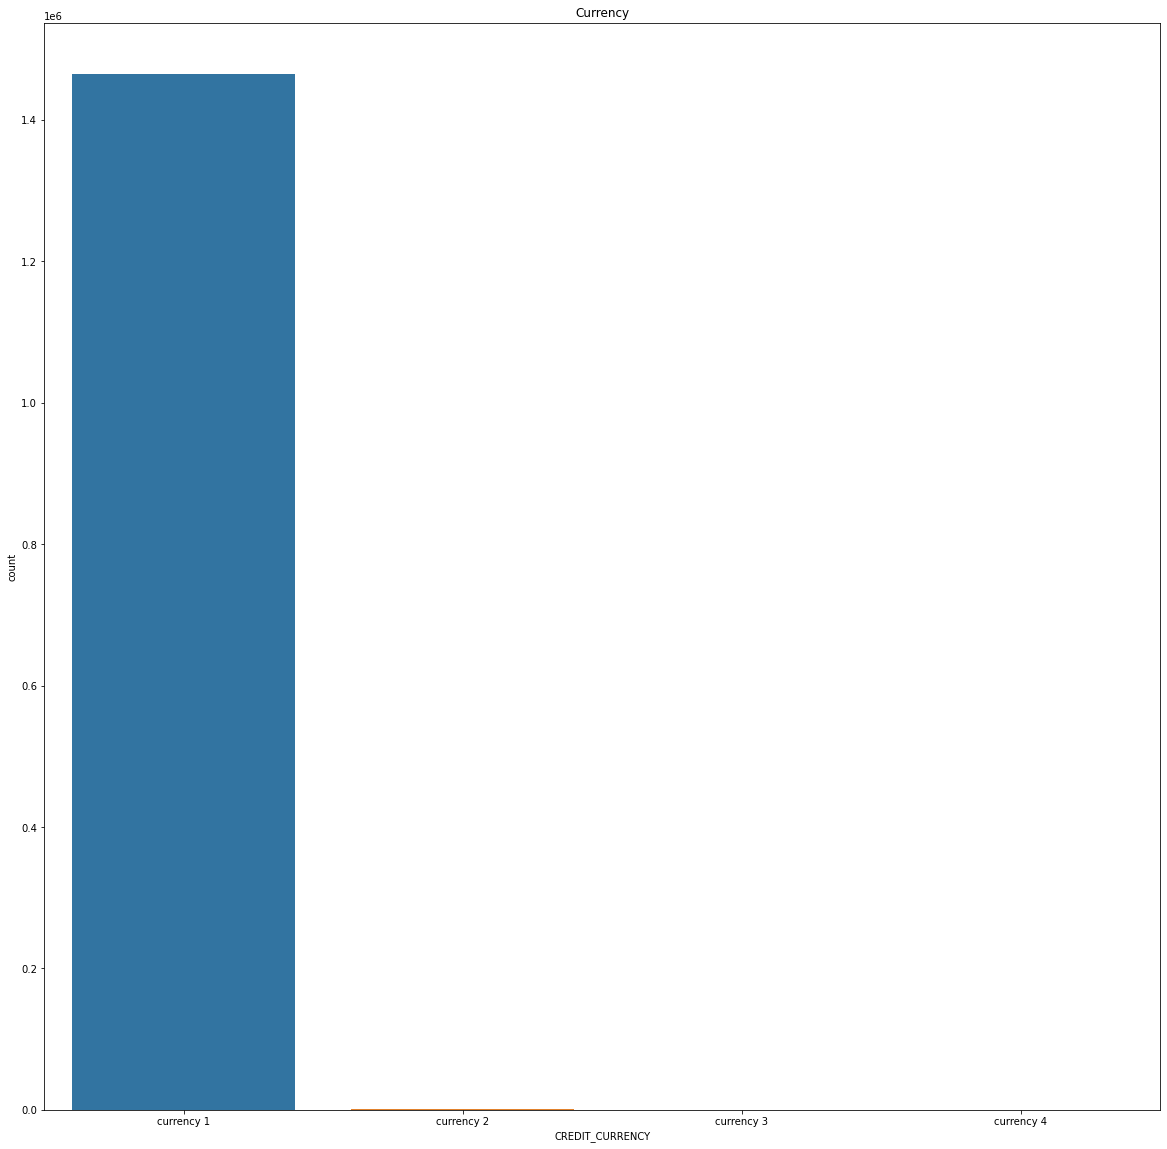

In [72]:
# Quantification selon le Type de Monnaie :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'CREDIT_CURRENCY', data = office, order = office['CREDIT_CURRENCY'].value_counts().index)

plt.title('Currency')

plt.show()

# Interprétation :

- Les Emprunts sont remboursés, avec une seule monnaie.

# TYPE DE CREDIT :

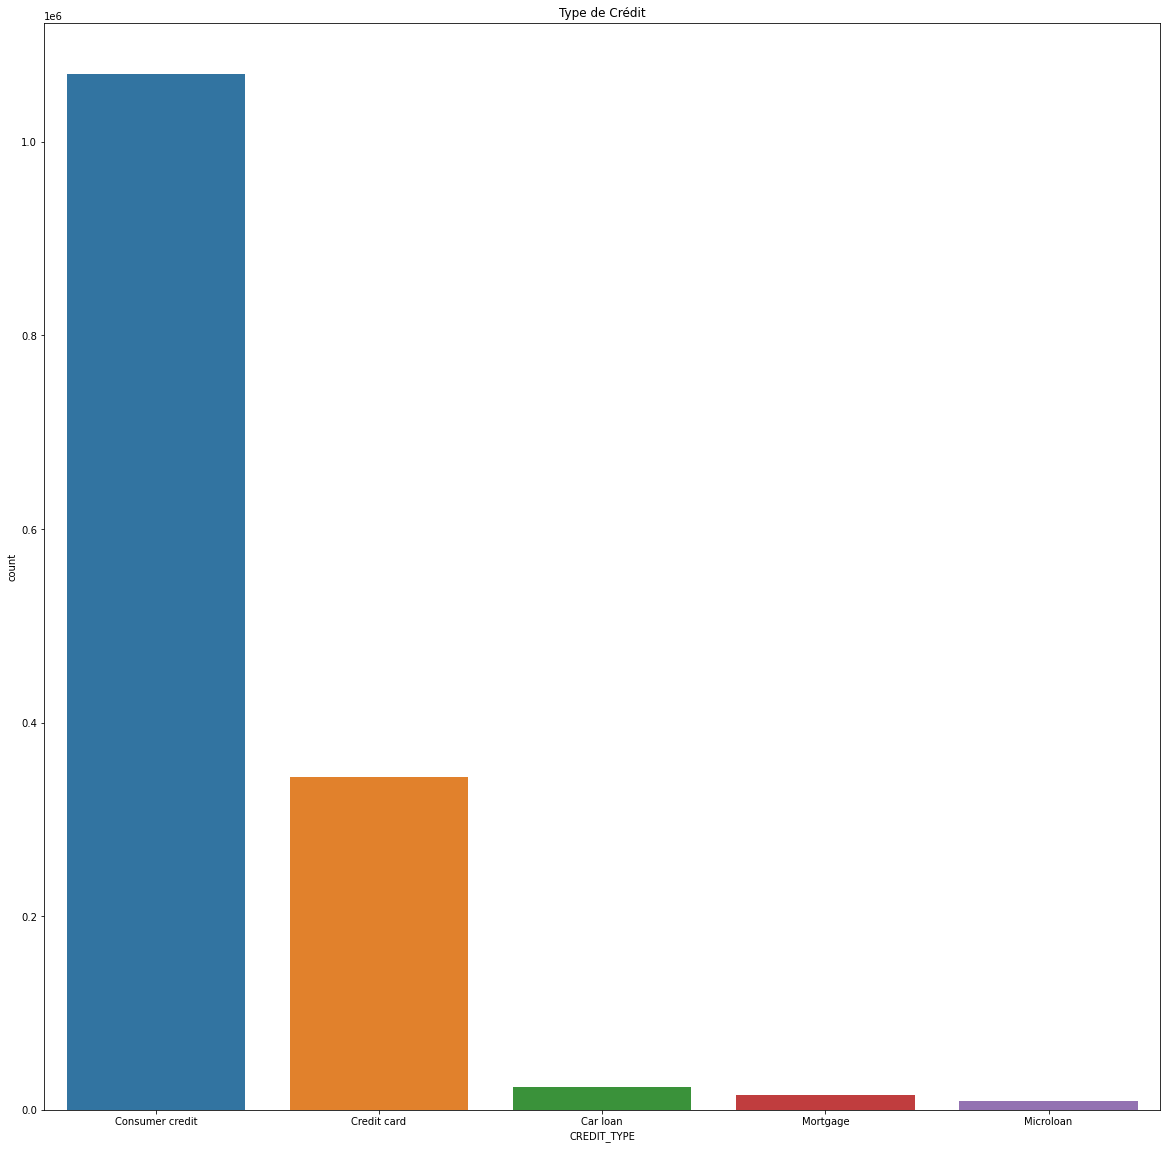

In [73]:
# Quantification selon le Type de Crédit :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'CREDIT_TYPE', data = office, order = office['CREDIT_TYPE'].value_counts()[:5].index)

plt.title('Type de Crédit')

plt.show()

# Interprétation :

- La plupart des Crédits contractés sont des Crédits à la Consommation.

# GAMMA- Lecture Fichier "PREVIOUS_APPLICATION" :

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

In [74]:
# Previous Application Data :
    
prev = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/previous_application.csv')

# A- MISE EN EVIDENCE :

In [75]:
# Nombre de Lignes et de Colonnes :

nRow, nCol = prev.shape

print(f'Le dataset contient {nRow} Lignes et {nCol} Colonnes.')

Le dataset contient 1670214 Lignes et 37 Colonnes.


In [76]:
# Visualisation :

prev.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# B- MERGING :

In [77]:
# Fusion :

appli = app_train.merge(prev, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [78]:
# Visualisation :

appli.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


# C- COMPREHENSION DES VARIABLES : DATASET APPLI :

# TYPE DE CONTRAT :

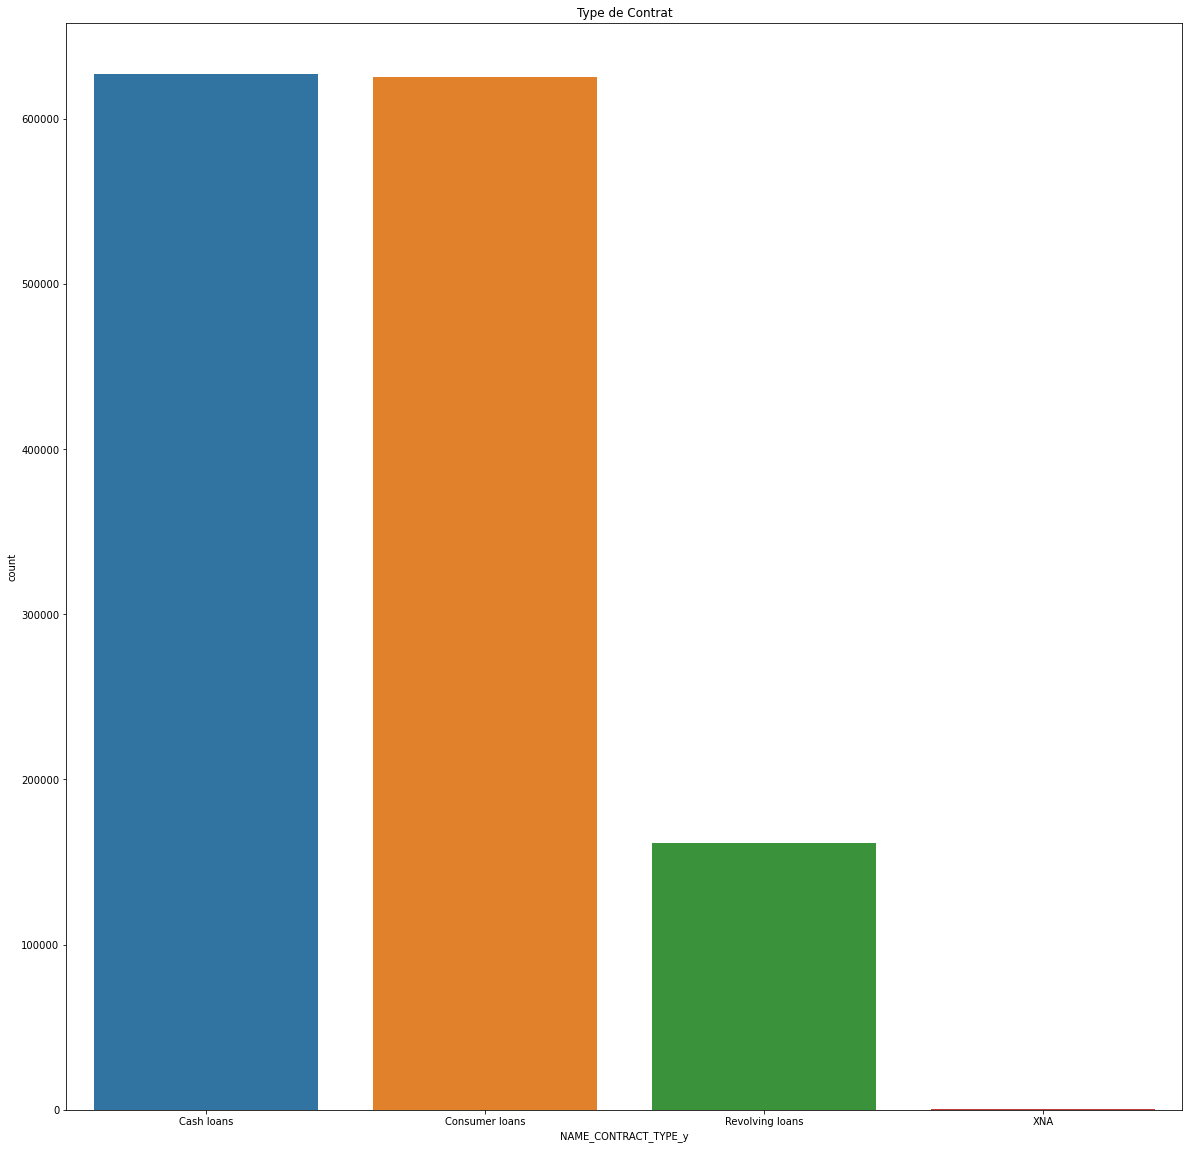

In [79]:
# Quantification selon le Type de Contrat :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'NAME_CONTRACT_TYPE_y', data = appli, order = appli['NAME_CONTRACT_TYPE_y'].value_counts().index)

plt.title('Type de Contrat')

plt.show()

# Interprétation :

- Le Cash Loan est majoritaire.

# STATUT DU CONTRAT :

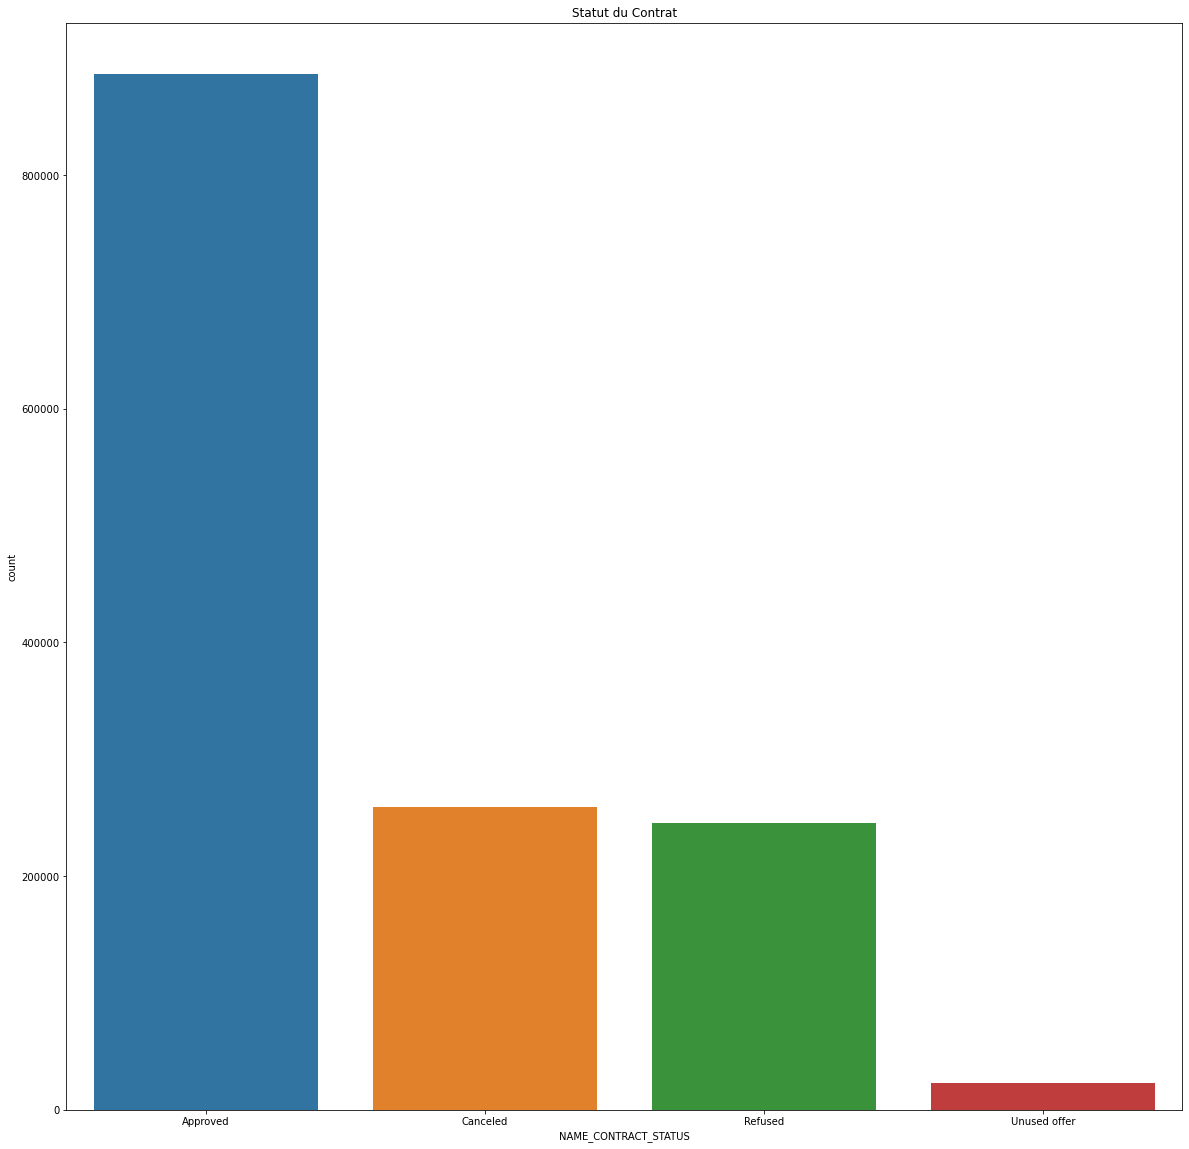

In [80]:
# Quantification selon le Statut du Contrat :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'NAME_CONTRACT_STATUS', data = appli, order = appli['NAME_CONTRACT_STATUS'].value_counts().index)

plt.title('Statut du Contrat')

plt.show()

# Interprétation :

- La majorité des Emprunts ont été approuvés.

# TYPE DE PAIEMENT :

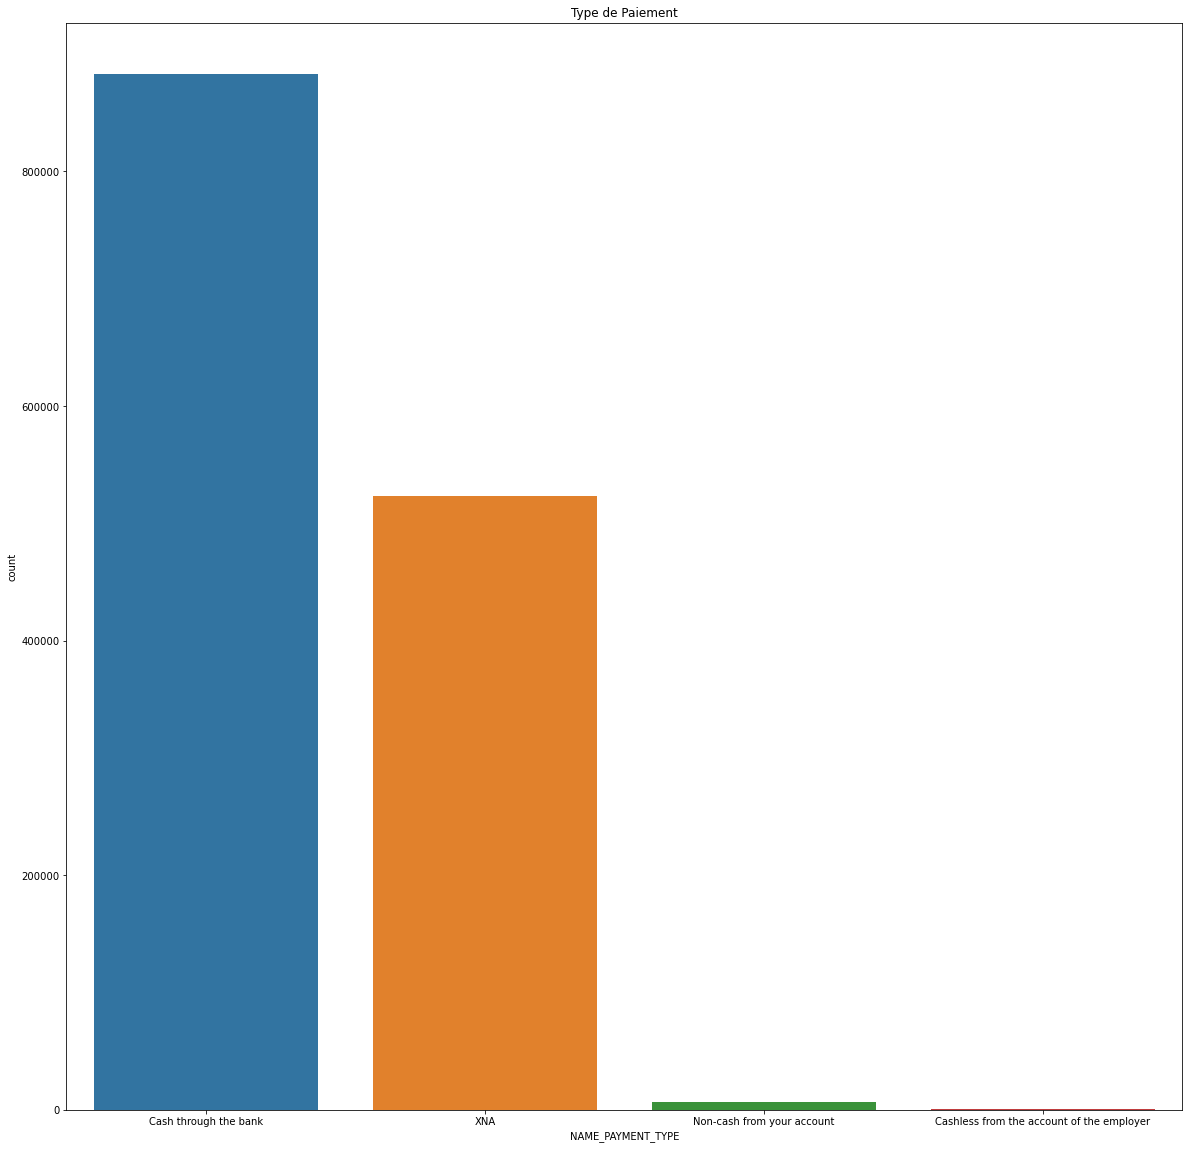

In [81]:
# Quantification selon le Type de Paiement :

plt.figure(figsize = (20, 20))

sns.countplot(x = 'NAME_PAYMENT_TYPE', data = appli, order = appli['NAME_PAYMENT_TYPE'].value_counts().index)

plt.title('Type de Paiement')

plt.show()

# Interprétation :

- La majorité des Emprunts ont été remboursés par virement bancaire.

# II ASSEMBLAGE DE TOUTES LES DONNEES A PARTIR DES FICHIERS :

# A- ETUDE DU DATASET INITIAL :

In [82]:
# Création et Visualisation du Dataset :

war = app_train.append(app_test)

war.head(5)

/var/folders/_5/v63wfks92ynb3p2nthszhh2m0000gn/T/ipykernel_15524/4001846535.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [83]:
# Nombre de Lignes et de Colonnes :

nRow, nCol = war.shape

print(f'Le dataset contient {nRow} Lignes et {nCol} Colonnes.')

Le dataset contient 356255 Lignes et 123 Colonnes.


<AxesSubplot:>

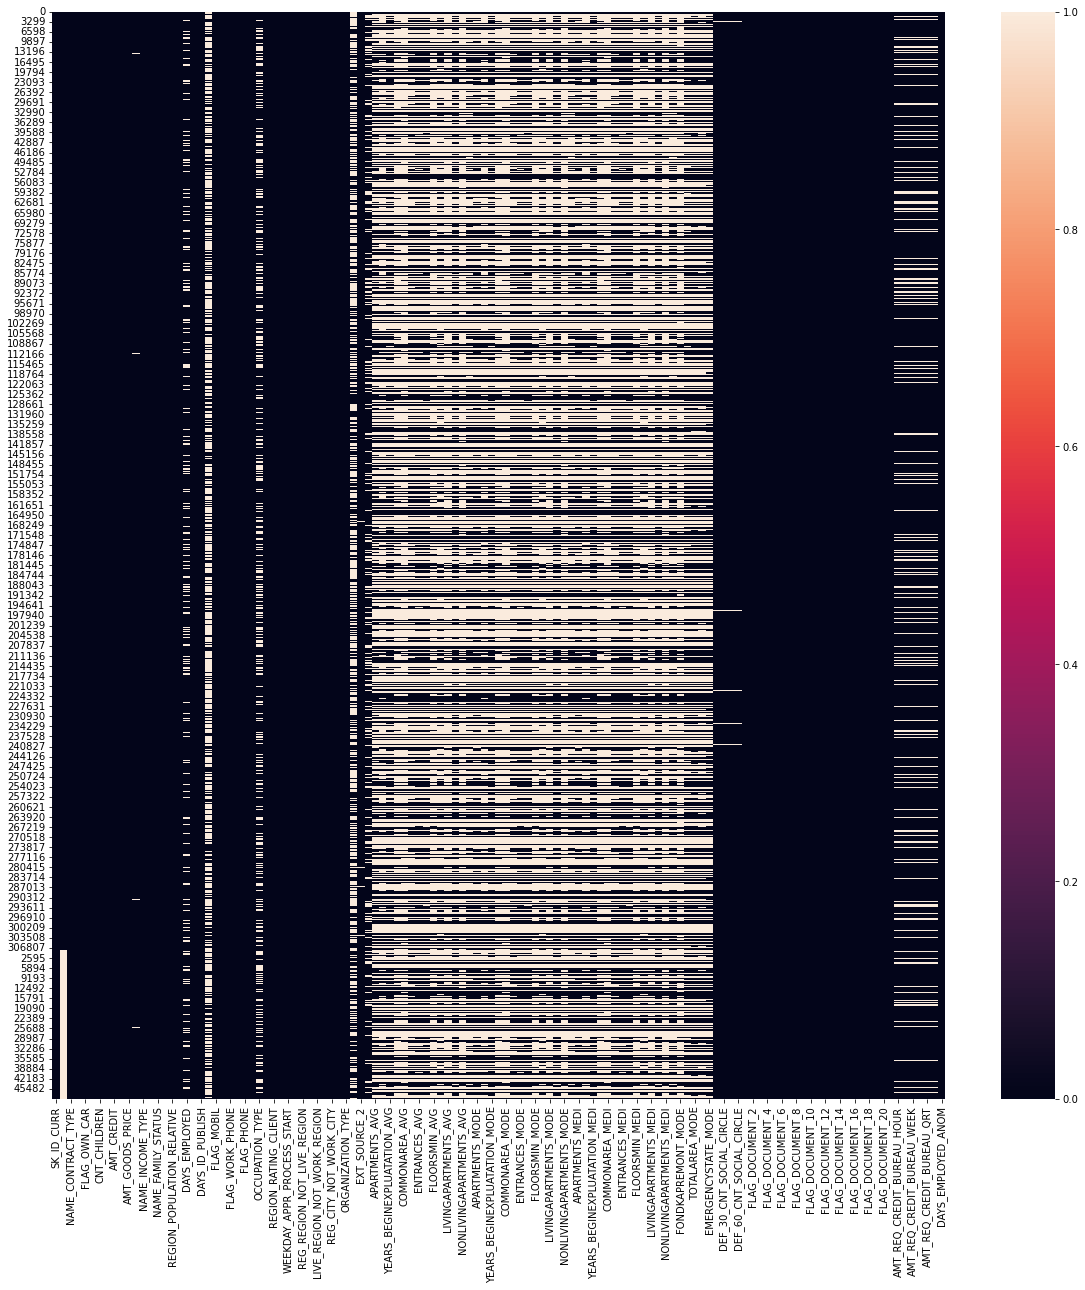

In [84]:
# Heatmap de Valeurs Manquantes du nouveau Dataset :

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(war.isnull())

# B- AJOUT DE VARIABLES :

In [85]:
# Mise en Evidence du Nombre Total de Crédits pour chaque Client :

previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})

previous_loan_counts.head(5)

,SK_ID_CURR,PREVIOUS_LOANS_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [86]:
# Merging :

war = war.merge(previous_loan_counts, on='SK_ID_CURR', how='left')

war.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,PREVIOUS_LOANS_COUNT
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,8.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,2.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.0


# DELTA- Lecture Fichier "bureau_balance" :

Soldes mensuels des crédits antérieurs au bureau de crédit. Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit.

In [87]:
# Bureau Balance Data :

bureau_balance = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/bureau_balance.csv')

# Calcul Moyenne Balance selon les Mois + Merging :

In [88]:
# Moyenne Bureau Balance :

bureau_bal_mean = bureau_balance.groupby('SK_ID_BUREAU', as_index=False).mean().rename(columns = {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})

bureau_bal_mean.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE_MEAN
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


In [89]:
# Merging :

bureau_full = bureau.merge(bureau_bal_mean, on='SK_ID_BUREAU', how='left')

bureau_full.drop('SK_ID_BUREAU', axis=1, inplace=True)

bureau_full.head(5)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_MEAN
0,215354,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN
1,215354,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN
2,215354,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN
3,215354,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN
4,215354,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN


In [90]:
# Moyenne après Fusion :

bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_')

bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})

bureau_mean.head(5)

,SK_ID_CURR,PREV_BUR_MEAN_DAYS_CREDIT,PREV_BUR_MEAN_CREDIT_DAY_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE,PREV_BUR_MEAN_DAYS_ENDDATE_FACT,PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,PREV_BUR_MEAN_CNT_CREDIT_PROLONG,PREV_BUR_MEAN_AMT_CREDIT_SUM,PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT,PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT,PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_UPDATE,PREV_BUR_MEAN_AMT_ANNUITY,PREV_BUR_MEAN_MONTHS_BALANCE_MEAN
0,100001,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,0.0,-93.142857,3545.357143,-11.785714
1,100002,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,0.0,-499.875000,0.000000,-21.875000
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,0.0,-816.000000,NaN,NaN
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,0.0,-532.000000,NaN,NaN
4,100005,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,0.0,-54.333333,1420.500000,-3.000000


In [91]:
# Merging :

war = war.merge(bureau_mean, on='SK_ID_CURR', how='left')

war.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_BUR_MEAN_DAYS_ENDDATE_FACT,PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,PREV_BUR_MEAN_CNT_CREDIT_PROLONG,PREV_BUR_MEAN_AMT_CREDIT_SUM,PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT,PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT,PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_UPDATE,PREV_BUR_MEAN_AMT_ANNUITY,PREV_BUR_MEAN_MONTHS_BALANCE_MEAN
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0,-21.875
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN,NaN
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-532.500000,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN,NaN
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.000000,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN,NaN


# EPSILON- Lecture Fichier "previous_application" + Merging :

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données

In [92]:
# Previous Application Data :

previous_application = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/previous_application.csv')

In [93]:
# Quantification des Applications :

previous_application_counts = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})

previous_application_counts.head(5)

,SK_ID_CURR,PREVIOUS_APPLICATION_COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [94]:
# Merging :

war = war.merge(previous_application_counts, on='SK_ID_CURR', how='left')

war.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,PREV_BUR_MEAN_CNT_CREDIT_PROLONG,PREV_BUR_MEAN_AMT_CREDIT_SUM,PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT,PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT,PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_UPDATE,PREV_BUR_MEAN_AMT_ANNUITY,PREV_BUR_MEAN_MONTHS_BALANCE_MEAN,PREVIOUS_APPLICATION_COUNT
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0,-21.875,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN,NaN,3.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN,NaN,1.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN,NaN,6.0


# ZETA- Lecture Fichier "credit_card_balance" :

Aperçus mensuels du solde des cartes de crédit. Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit.

In [95]:
# Credit Card Data :

cred_card = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/credit_card_balance.csv')

In [96]:
# Elimination de la Colonne "SK_ID_CURR":

cred_card.drop('SK_ID_CURR', axis=1, inplace=True)

# Calcul Moyenne Balance Cartes de Crédit + Merging :

In [97]:
# Moyenne de Balance des Cartes de Crédit :

credit_card_balance_mean = cred_card.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')

credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)

credit_card_balance_mean.head(5)

,SK_ID_PREV,CARD_MEAN_MONTHS_BALANCE,CARD_MEAN_AMT_BALANCE,CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,CARD_MEAN_AMT_DRAWINGS_CURRENT,CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,CARD_MEAN_AMT_INST_MIN_REGULARITY,CARD_MEAN_AMT_PAYMENT_CURRENT,...,CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,CARD_MEAN_AMT_RECIVABLE,CARD_MEAN_AMT_TOTAL_RECEIVABLE,CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,CARD_MEAN_CNT_DRAWINGS_CURRENT,CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,CARD_MEAN_SK_DPD,CARD_MEAN_SK_DPD_DEF
0,1000018,-4.0,74946.285000,81000.000000,5400.000000,29478.996000,0.0,24078.996000,2594.088000,5541.750000,...,72298.197000,73602.585000,73602.585000,1.200000,8.8000,0.0,7.600000,2.0000,0.0,0.0
1,1000030,-4.5,55991.064375,81562.500000,642.857143,17257.438125,0.0,19079.929286,2078.223750,6188.631429,...,55474.453125,55935.376875,55935.376875,0.142857,5.1250,0.0,5.714286,1.8750,0.0,0.0
2,1000031,-8.5,52394.439375,149625.000000,12115.384615,28959.615000,0.0,23527.218462,2675.300625,29543.257500,...,51402.878437,52099.970625,52099.970625,0.307692,1.3125,0.0,1.307692,3.6875,0.0,0.0
3,1000035,-4.0,0.000000,225000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.0000,NaN,NaN,0.0000,0.0,0.0
4,1000077,-7.0,0.000000,94090.909091,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.0000,NaN,NaN,0.0000,0.0,0.0


In [98]:
# Merging :

previous_application = previous_application.merge(credit_card_balance_mean, on='SK_ID_PREV', how='left')

previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,CARD_MEAN_AMT_RECIVABLE,CARD_MEAN_AMT_TOTAL_RECEIVABLE,CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,CARD_MEAN_CNT_DRAWINGS_CURRENT,CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,CARD_MEAN_SK_DPD,CARD_MEAN_SK_DPD_DEF
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ETA- Lecture Fichier "installments_payments" :

Historique de remboursement des crédits précédemment décaissés.

In [99]:
# Installments Payments Data :

install = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/installments_payments.csv')

In [100]:
# Elimination de la Colonne "SK_ID_CURR" :

install.drop('SK_ID_CURR', axis=1, inplace=True)

# Calcul Moyenne "Installments" + Merging :

In [101]:
# Moyenne des Installments :

install_pay_mean = install.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')

install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)

install_pay_mean.head(5)

,SK_ID_PREV,INSTALL_MEAN_NUM_INSTALMENT_VERSION,INSTALL_MEAN_NUM_INSTALMENT_NUMBER,INSTALL_MEAN_DAYS_INSTALMENT,INSTALL_MEAN_DAYS_ENTRY_PAYMENT,INSTALL_MEAN_AMT_INSTALMENT,INSTALL_MEAN_AMT_PAYMENT
0,1000001,1.500000,1.500000,-253.000000,-269.000000,34221.712500,34221.712500
1,1000002,1.250000,2.500000,-1555.000000,-1574.750000,9308.891250,9308.891250
2,1000003,1.000000,2.000000,-64.000000,-79.333333,4951.350000,4951.350000
3,1000004,1.142857,4.000000,-772.000000,-798.714286,4789.022143,4789.022143
4,1000005,1.000000,5.818182,-1543.454545,-1551.909091,14703.210000,13365.609545


In [102]:
# Merging :

previous_application = previous_application.merge(install_pay_mean, on='SK_ID_PREV', how='left')

previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,CARD_MEAN_SK_DPD,CARD_MEAN_SK_DPD_DEF,INSTALL_MEAN_NUM_INSTALMENT_VERSION,INSTALL_MEAN_NUM_INSTALMENT_NUMBER,INSTALL_MEAN_DAYS_INSTALMENT,INSTALL_MEAN_DAYS_ENTRY_PAYMENT,INSTALL_MEAN_AMT_INSTALMENT,INSTALL_MEAN_AMT_PAYMENT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,NaN,NaN,NaN,NaN,2.000000,1.0,-42.0,-42.000000,17284.275000,17284.275000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,NaN,NaN,NaN,NaN,1.000000,3.0,-74.0,-83.200000,25188.615000,25188.615000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,NaN,NaN,NaN,NaN,1.000000,5.0,-151.0,-159.222222,15060.735000,15060.735000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,NaN,NaN,NaN,NaN,1.090909,6.0,-332.0,-339.090909,51193.943182,51193.943182
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# THETA- Lecture Fichier "POS CASH Balance" :

Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.

In [103]:
# POS CASH Balance Data :

pos = pd.read_csv('/Users/sylvaincarlevato/Downloads/home-credit-default-risk/POS_CASH_balance.csv')

In [104]:
# Elimination de la Colonne "SK_ID_CURR" :

pos.drop('SK_ID_CURR', axis=1, inplace=True)

# Calcul Moyenne CASH + Merging :

In [105]:
# Moyenne des POS_CASH Balance :

POS_mean = install.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')

POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)

POS_mean.head(5)

,SK_ID_PREV,POS_MEAN_NUM_INSTALMENT_VERSION,POS_MEAN_NUM_INSTALMENT_NUMBER,POS_MEAN_DAYS_INSTALMENT,POS_MEAN_DAYS_ENTRY_PAYMENT,POS_MEAN_AMT_INSTALMENT,POS_MEAN_AMT_PAYMENT
0,1000001,1.500000,1.500000,-253.000000,-269.000000,34221.712500,34221.712500
1,1000002,1.250000,2.500000,-1555.000000,-1574.750000,9308.891250,9308.891250
2,1000003,1.000000,2.000000,-64.000000,-79.333333,4951.350000,4951.350000
3,1000004,1.142857,4.000000,-772.000000,-798.714286,4789.022143,4789.022143
4,1000005,1.000000,5.818182,-1543.454545,-1551.909091,14703.210000,13365.609545


In [106]:
# Merging :

previous_application = previous_application.merge(POS_mean, on='SK_ID_PREV', how='left')

previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,INSTALL_MEAN_DAYS_INSTALMENT,INSTALL_MEAN_DAYS_ENTRY_PAYMENT,INSTALL_MEAN_AMT_INSTALMENT,INSTALL_MEAN_AMT_PAYMENT,POS_MEAN_NUM_INSTALMENT_VERSION,POS_MEAN_NUM_INSTALMENT_NUMBER,POS_MEAN_DAYS_INSTALMENT,POS_MEAN_DAYS_ENTRY_PAYMENT,POS_MEAN_AMT_INSTALMENT,POS_MEAN_AMT_PAYMENT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,-42.0,-42.000000,17284.275000,17284.275000,2.000000,1.0,-42.0,-42.000000,17284.275000,17284.275000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,-74.0,-83.200000,25188.615000,25188.615000,1.000000,3.0,-74.0,-83.200000,25188.615000,25188.615000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,-151.0,-159.222222,15060.735000,15060.735000,1.000000,5.0,-151.0,-159.222222,15060.735000,15060.735000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,-332.0,-339.090909,51193.943182,51193.943182,1.090909,6.0,-332.0,-339.090909,51193.943182,51193.943182
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calcul Moyenne PREV APP :

In [107]:
# Moyenne des Previous Applications :

prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')

prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace=True)

prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis=1)

prev_appl_mean.head(5)

,SK_ID_CURR,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_APPLICATION,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_AMT_GOODS_PRICE,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,...,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100001,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,NaN,...,-1664.000000,-1679.500000,7312.725000,7312.725000,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000
1,100002,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,NaN,...,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,NaN,...,-1164.333333,-1171.781746,78558.479286,78558.479286,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286
3,100004,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,NaN,...,-754.000000,-761.666667,7096.155000,7096.155000,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,NaN,...,-586.000000,-609.555556,6240.205000,6240.205000,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000


# III ELABORATION ET ETUDE DU DATASET DE TRAVAIL :

# A- MERGING FINAL :

In [108]:
# Merging :

war = war.merge(prev_appl_mean, on='SK_ID_CURR', how='left')

war

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1164.333333,-1171.781746,78558.479286,78558.479286,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-754.000000,-761.666667,7096.155000,7096.155000,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-260.666667,-285.966667,241944.225000,241944.225000,1.400000,3.166667,-260.666667,-285.966667,241944.225000,241944.225000
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1087.881319,-1090.768539,12122.995738,11671.540210,1.129412,6.843956,-1087.881319,-1090.768539,12122.995738,11671.540210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,-623.000000,-630.333333,91036.455000,91036.455000,1.333333,2.000000,-623.000000,-630.333333,91036.455000,91036.455000
356251,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,-1271.071429,-1278.007738,6967.485359,6671.724852,1.000000,9.289286,-1271.071429,-1278.007738,6967.485359,6671.724852
356252,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,-378.500000,-406.916667,19652.977500,19652.977500,1.083333,2.500000,-378.500000,-406.916667,19652.977500,19652.977500
356253,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,-1206.500000,-1212.665789,14487.122250,14487.122250,1.000000,7.750000,-1206.500000,-1212.665789,14487.122250,14487.122250


In [109]:
# Sauvegarde :

war.to_csv('data_final.csv', index=True)

# B- FEATURE ENGINEERING :

In [110]:
# Feature Engineering :

war['CREDIT_INCOME_PERCENT'] = war['AMT_CREDIT'] / war['AMT_INCOME_TOTAL']

war['ANNUITY_INCOME_PERCENT'] = war['AMT_ANNUITY'] / war['AMT_INCOME_TOTAL']

war['CREDIT_TERM'] = war['AMT_ANNUITY'] / war['AMT_CREDIT']

war['DAYS_EMPLOYED_PERCENT'] = war['DAYS_EMPLOYED'] / war['DAYS_BIRTH']

In [111]:
# Sauvegarde :

war.to_csv('data_final_feat_eng.csv', index = True)

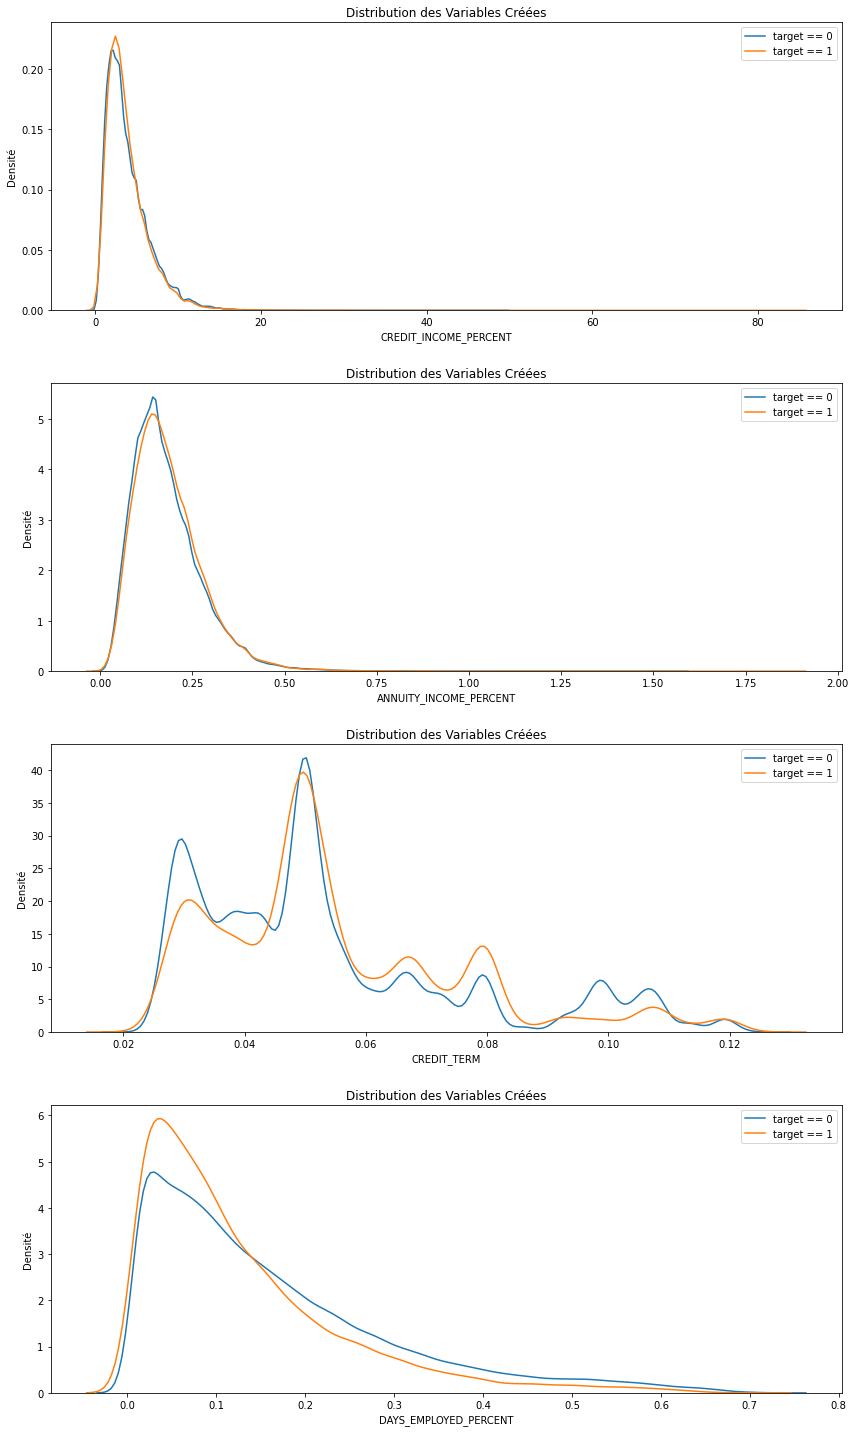

In [112]:
# Itération et Plot :

plt.figure(figsize = (12, 20))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    plt.subplot(4, 1, i + 1)

    sns.kdeplot(war.loc[war['TARGET'] == 0, feature], label = 'target == 0')

    sns.kdeplot(war.loc[war['TARGET'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution des Variables Créées')
    
    plt.xlabel('%s' % feature)
    
    plt.ylabel('Densité')
    
    plt.legend(loc="upper right", frameon=True)
    
    
plt.tight_layout(h_pad = 2.5)

In [113]:
# Nouvelles Variables :

features_engineering = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT',
                   'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

# C- CORRELATION :

In [114]:
# Corrélations :

print('Les Principales Correlations Positives:\n', war.corr()['TARGET'].sort_values().tail(15))

print('Les Principales Correlations Négatives:\n', war.corr()['TARGET'].sort_values().head(15))

Les Principales Correlations Positives:
 REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
PREV_BUR_MEAN_DAYS_CREDIT_UPDATE                     0.068927
PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY     0.074204
DAYS_EMPLOYED                                        0.074958
PREV_BUR_MEAN_MONTHS_BALANCE_MEAN                    0.076424
DAYS_BIRTH                                           0.078239
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT        0.080885
PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL    0.085491
PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE               0.085963
PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE        0.085967
PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE                 0.086693
PREV_BUR_MEAN_DAYS_CREDIT                            0.089729
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT    0.102917
TARGET                                               1.000000
Name: TARGET, dtype: float64


# IV DATA PRE-PROCESSING :

# A- SPLIT TRAIN / TEST :

In [115]:
# Split :

war_train = war[war['SK_ID_CURR'].isin(app_train.SK_ID_CURR)]

war_test = war[war['SK_ID_CURR'].isin(app_test.SK_ID_CURR)]

war_test = war_test.drop('TARGET', axis=1)

In [116]:
# Indexation :

war_train.set_index('SK_ID_CURR', inplace=True)

war_test.set_index('SK_ID_CURR', inplace=True)

In [117]:
# Features Avec Colonnes Catégoriques :

print('Structure Features Train avec Colonnes Catégoriques : ', war_train.shape)

print('Structure Features Test avec Colonnes Catégoriques : ', war_test.shape)

Structure Features Train avec Colonnes Catégoriques :  (307511, 192)
Structure Features Test avec Colonnes Catégoriques :  (48744, 191)


# B- ENCODAGE DES VARIABLES CATEGORIQUES PAR GET DUMMIES :

In [118]:
# Encodage :

war_train = pd.get_dummies(war_train)

war_test = pd.get_dummies(war_test)

In [119]:
# Features Avec Colonnes Catégoriques :

print('Structure Features Train avec Colonnes Catégoriques : ', war_train.shape)

print('Structure Features Test avec Colonnes Catégoriques : ', war_test.shape)

Structure Features Train avec Colonnes Catégoriques :  (307511, 316)
Structure Features Test avec Colonnes Catégoriques :  (48744, 312)


In [120]:
# Sauvegarde et Restructuration :

TARGET = war_train.TARGET

war_train.drop('TARGET', axis=1, inplace=True)

war_train, war_test = war_train.align(war_test, join='inner', axis=1)

In [121]:
# Structure Finale :

print(war_train.shape)

print(war_test.shape)

(307511, 312)
(48744, 312)


In [122]:
# Sauvegarde :

war_train.to_csv('data_train_final_feat_eng_enc.csv', index=True)

In [123]:
# Sauvegarde :

war_test.to_csv('data_test_final_feat_eng_enc.csv', index=True)

In [124]:
# Copie et Structure :

train = war_train.copy()

test = war_test.copy()

train.shape, test.shape

((307511, 312), (48744, 312))

# C- STANDARDISATION DES DONNEES :

# Imputation des NAN :

In [125]:
# Quantité de Nans :

app_test_nan = app_test.isnull().sum()

app_test_nan

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
DAYS_EMPLOYED_ANOM               0
Length: 122, dtype: int64

In [126]:
# Remplacement par la Médiane :

war_test = war_test.fillna(war_test.median())

In [127]:
# Quantité de Nans :

app_train_nan = app_train.isnull().sum()

app_train_nan

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
DAYS_EMPLOYED_ANOM                0
Length: 123, dtype: int64

In [128]:
# Remplacement par la Médiane :

war_train = war_train.fillna(war_train.median())

# Standardisation par ROBUSTSCALER :

In [129]:
# Importation :

from sklearn import preprocessing

In [130]:
# Scale Test :

scaler = preprocessing.RobustScaler()

war_test_scaled = scaler.fit_transform(war_test)

In [131]:
# Scale Train :

scaler = preprocessing.RobustScaler()

war_train_scaled = scaler.fit_transform(war_train)

In [132]:
# Split :

data_train = pd.DataFrame(war_train_scaled, index=war_train.index, columns=war_train.columns)

data_test = pd.DataFrame(war_test_scaled, index=war_test.index, columns=war_test.columns)

# Sauvegarde des Datasets Train / Test et TARGET :

In [133]:
# Sauvegarde :

TARGET.to_csv('TARGET.csv', index=True)

In [134]:
# Sauvegarde : 

data_train.to_csv('data_train_final_feat_eng_preprocessed.csv', index = True)

In [135]:
# Sauvegarde :

data_test.to_csv('data_test_final_feat_eng_preprocessed.csv', index = True)